In [ ]:
#!unzip '/content/Plant finder.v2i.yolov8.zip'

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 14.2 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=d514cd8af70b3b2d2f2c38bce2c9fddddf103e02e4be42f480830491d0e405d7
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="C9yZ97uSdNRP1Vb4QCXV")
project = rf.workspace("ece542nnproject").project("plant-finder")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.65, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Plant-finder-2 in yolov8:: 100%|██████████| 4846/4846 [00:01<00:00, 3012.11it/s]


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8l.pt")  # load a pretrained model (recommended for training)

100%|██████████| 83.7M/83.7M [00:01<00:00, 54.6MB/s]


In [6]:
model.train(data="/content/Plant-finder-2/data.yaml", epochs=200)  # train the model

Ultralytics YOLOv8.0.65 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Plant-finder-2/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic

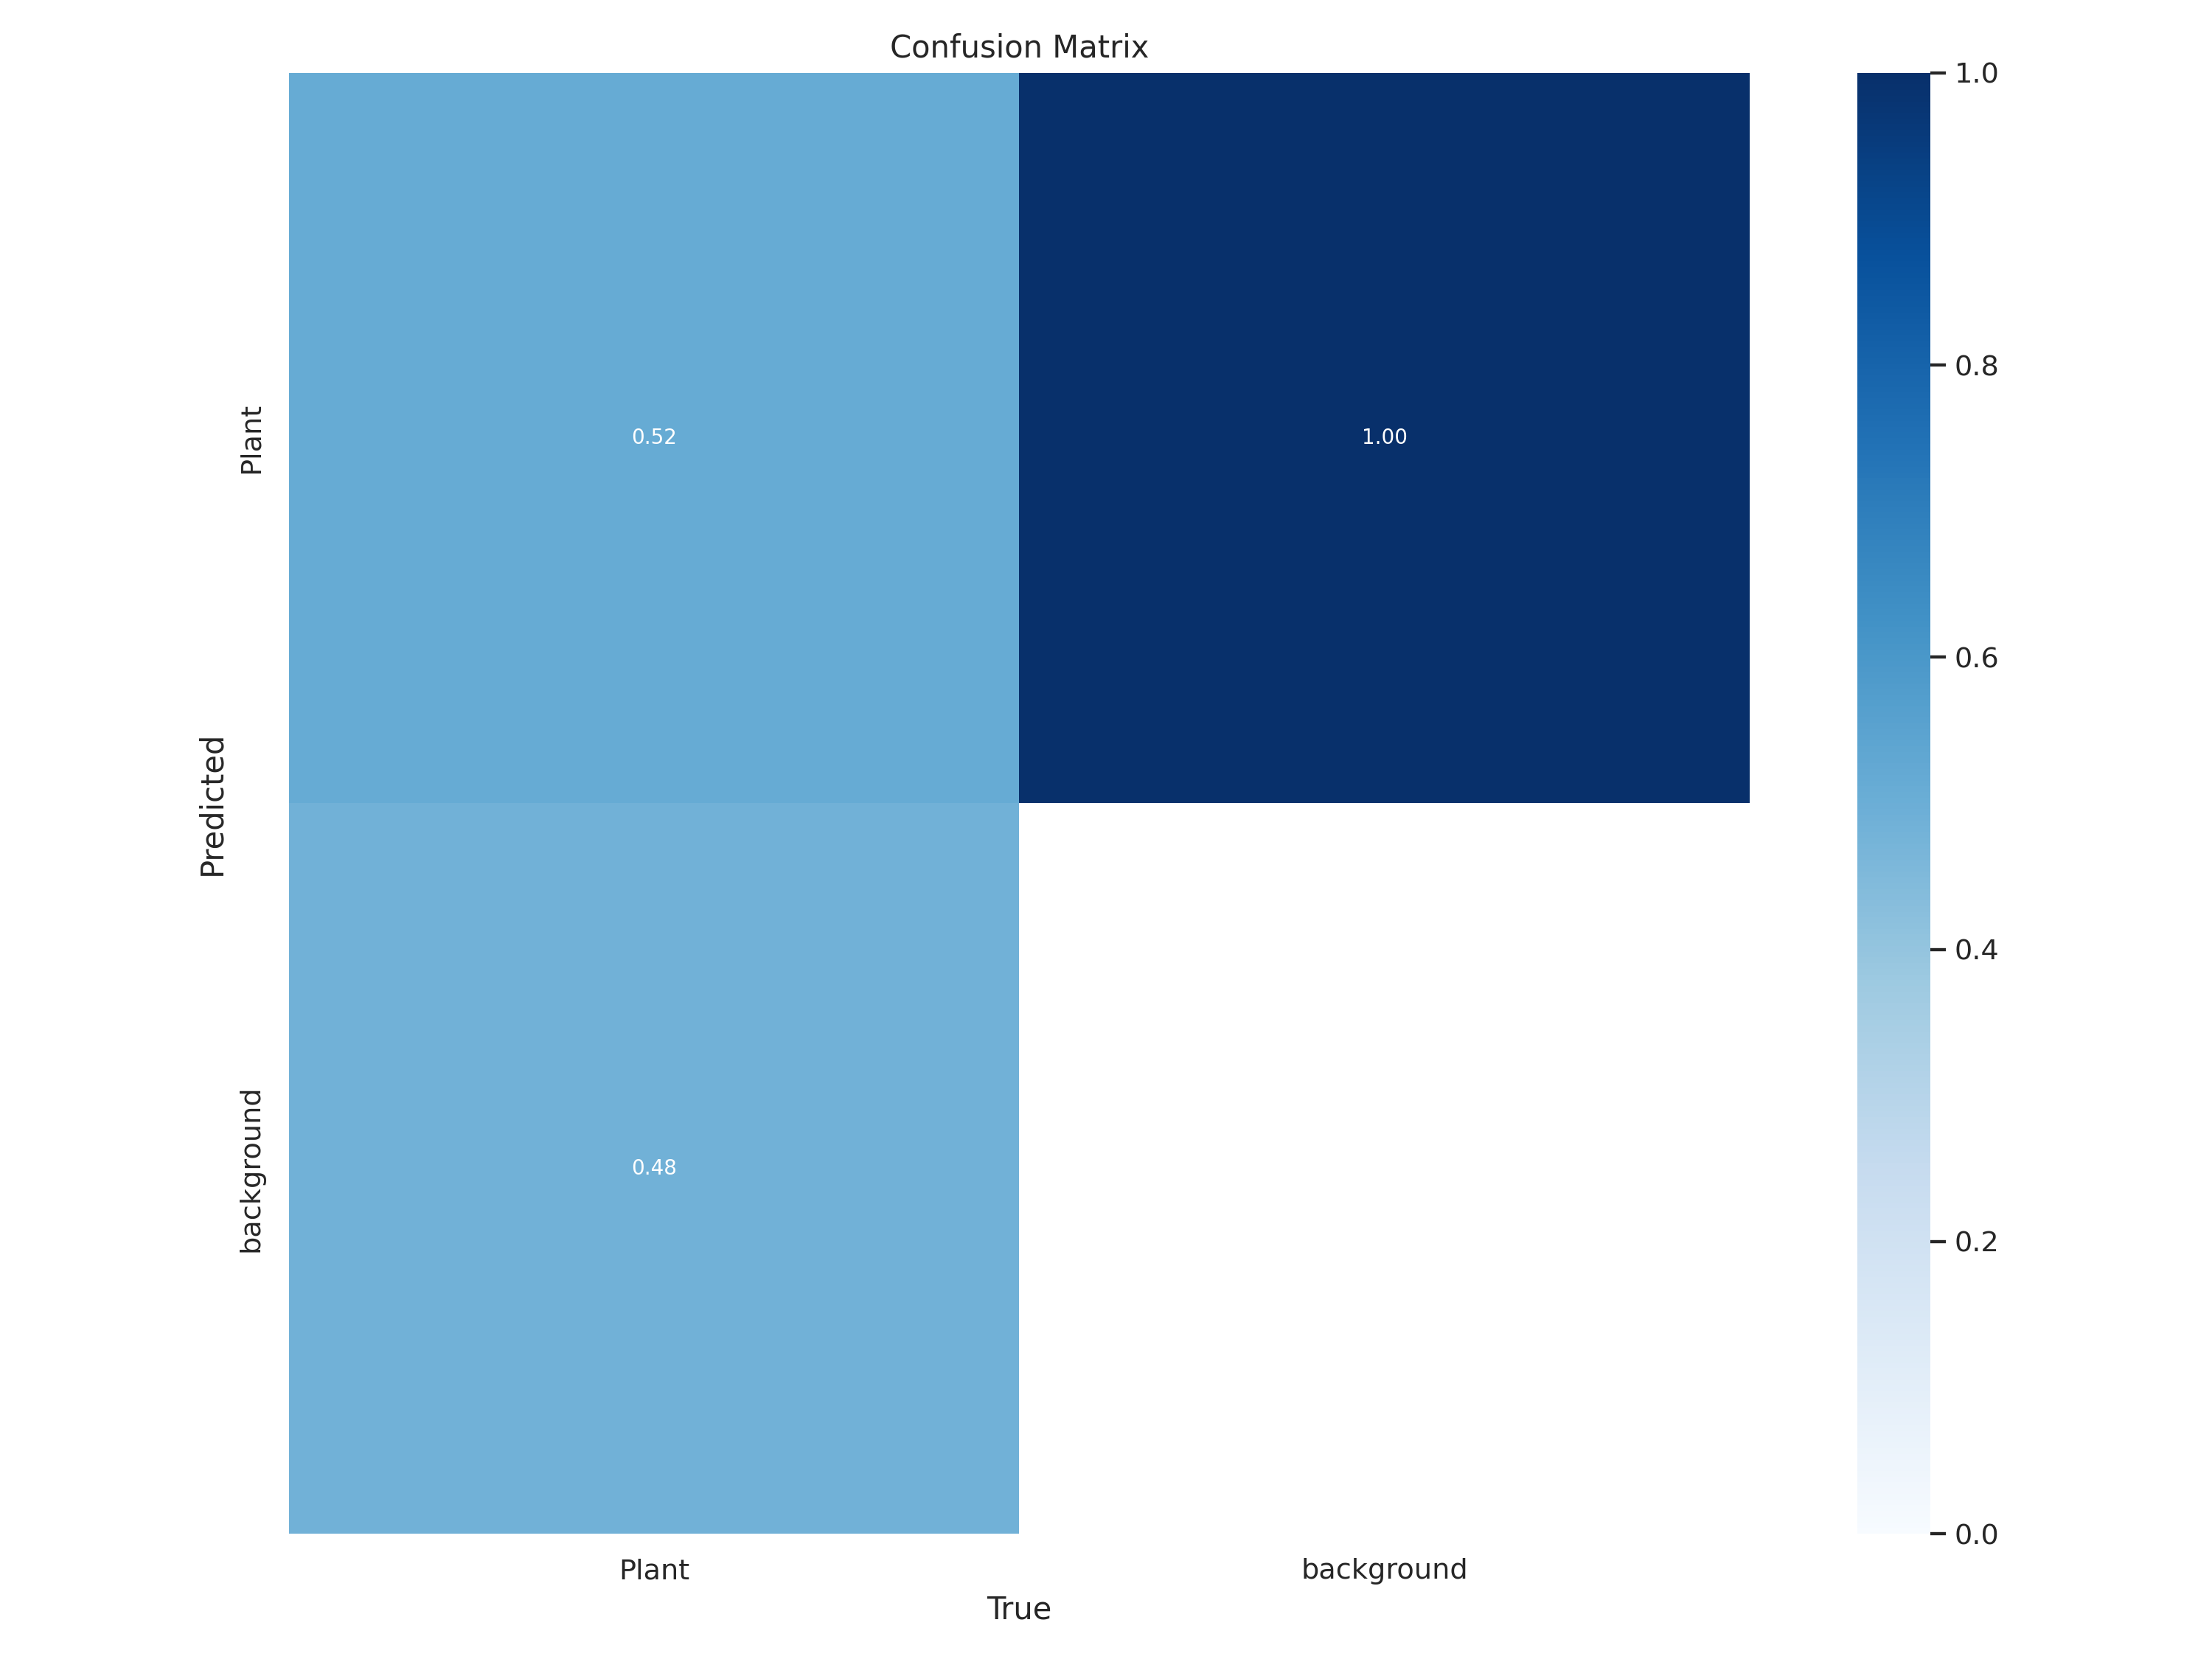

In [7]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train/confusion_matrix.png',width=600)

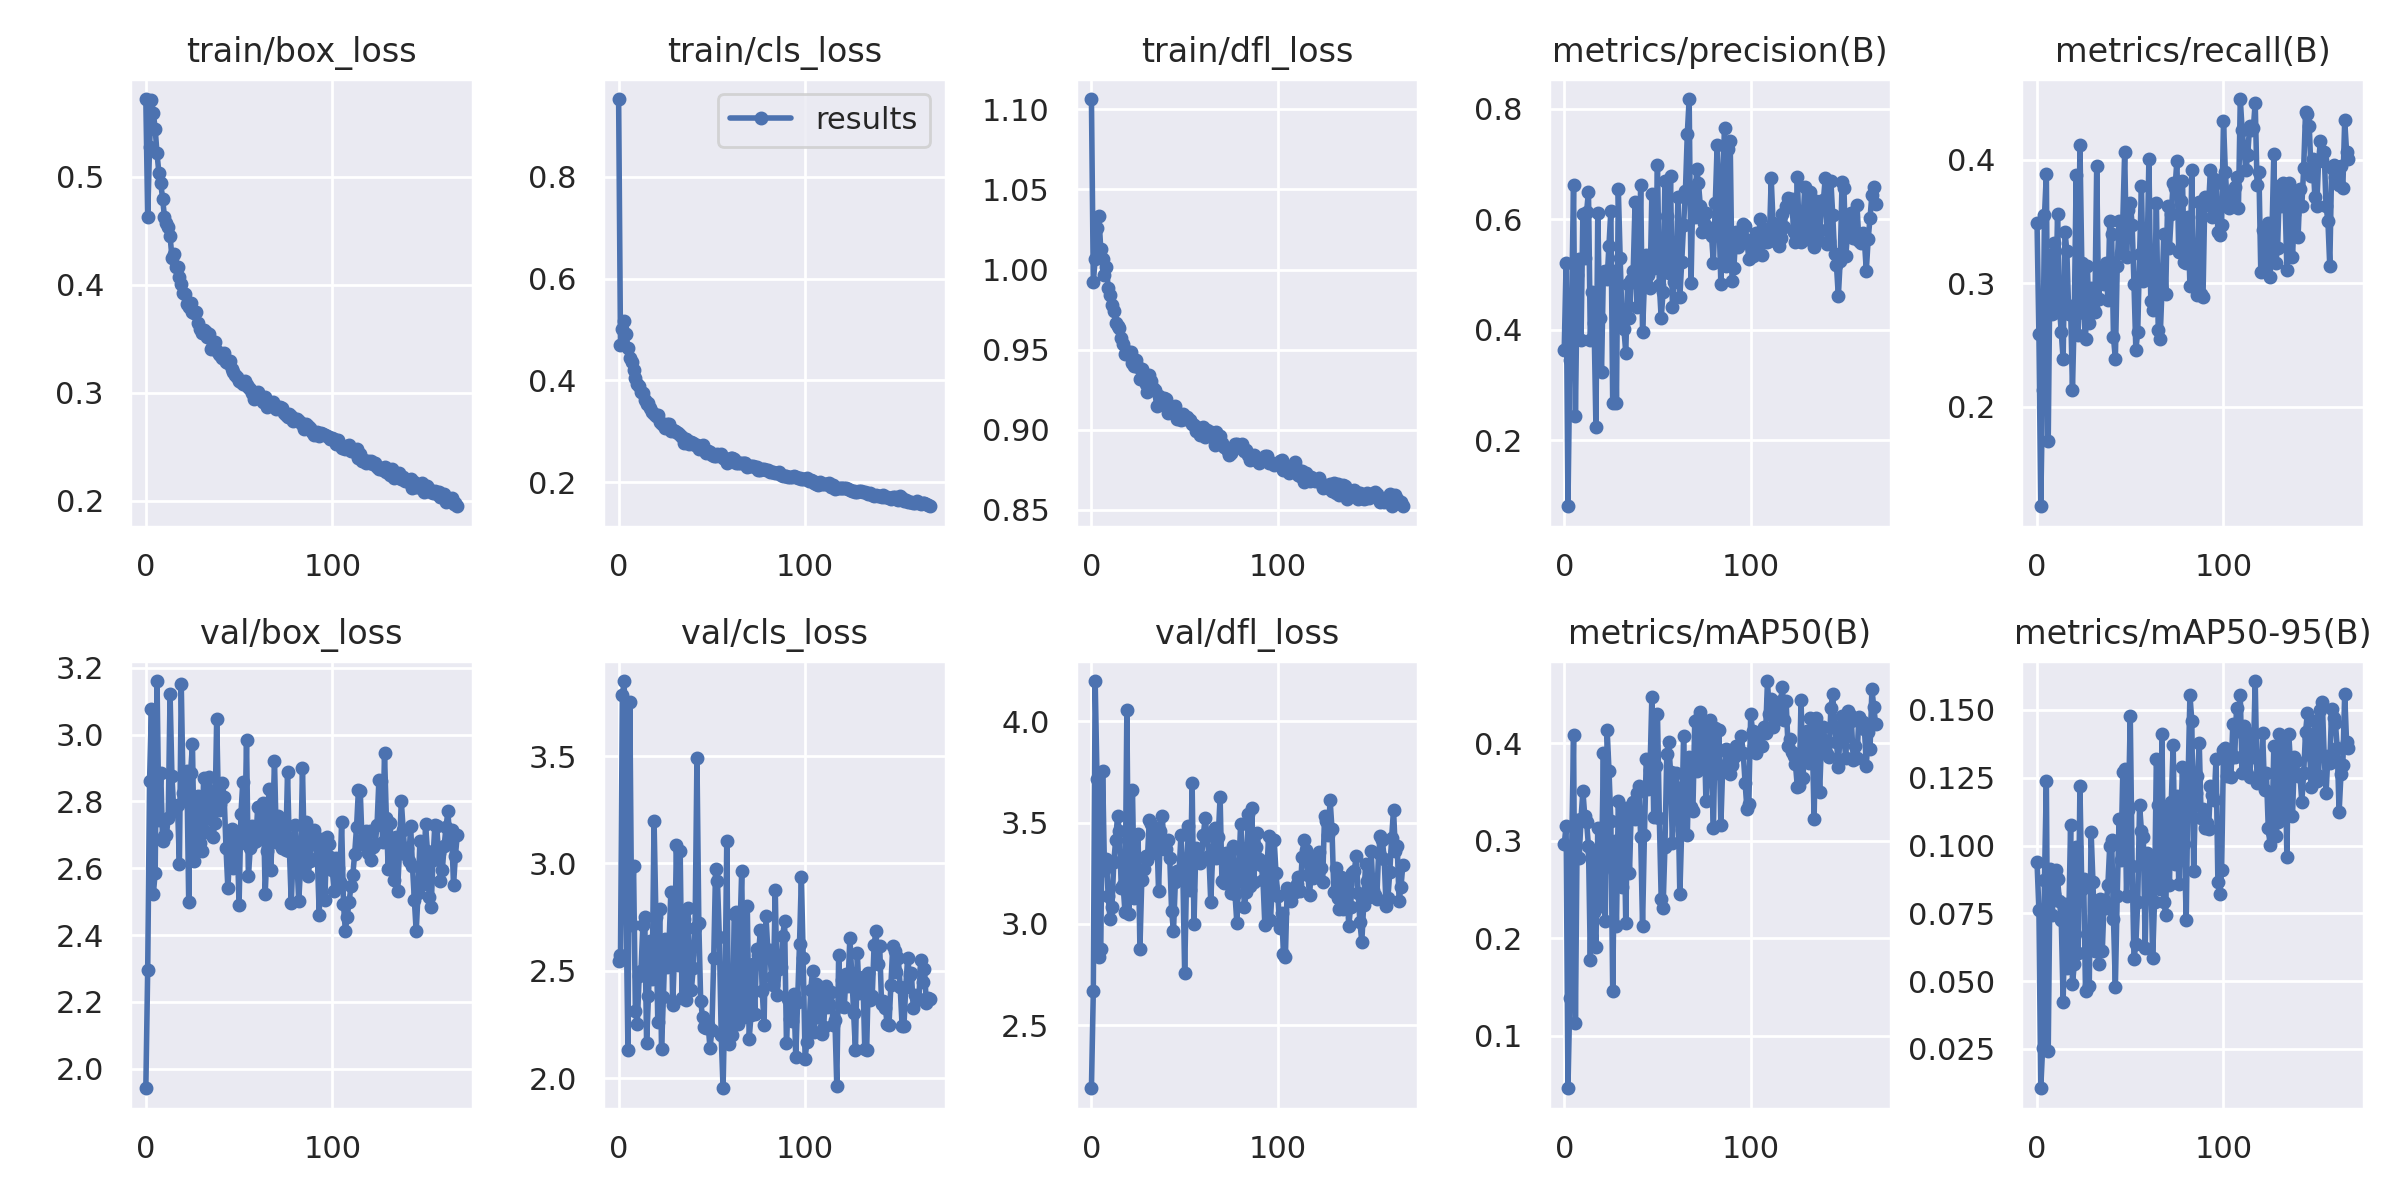

In [8]:
Image(filename='/content/runs/detect/train/results.png',width=600)

In [9]:
metrics = model.val()
metrics

Ultralytics YOLOv8.0.65 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/Plant-finder-2/valid/labels.cache... 208 images, 0 backgrounds, 0 corrupt: 100%|██████████| 208/208 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.04s/it]
                   all        208        679      0.611      0.446      0.458      0.161
Speed: 3.4ms preprocess, 36.6ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/val


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fb4056008b0>
fitness: 0.1904849331164077
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.16077])
names: {0: 'Plant'}
plot: True
results_dict: {'metrics/precision(B)': 0.6109667266910721, 'metrics/recall(B)': 0.44624447717231225, 'metrics/mAP50(B)': 0.4579514866976215, 'metrics/mAP50-95(B)': 0.1607664271629395, 'fitness': 0.1904849331164077}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 3.4061028407170224, 'inference': 36.60305990622594, 'loss': 0.0011852154364952673, 'postprocess': 3.139972686767578}

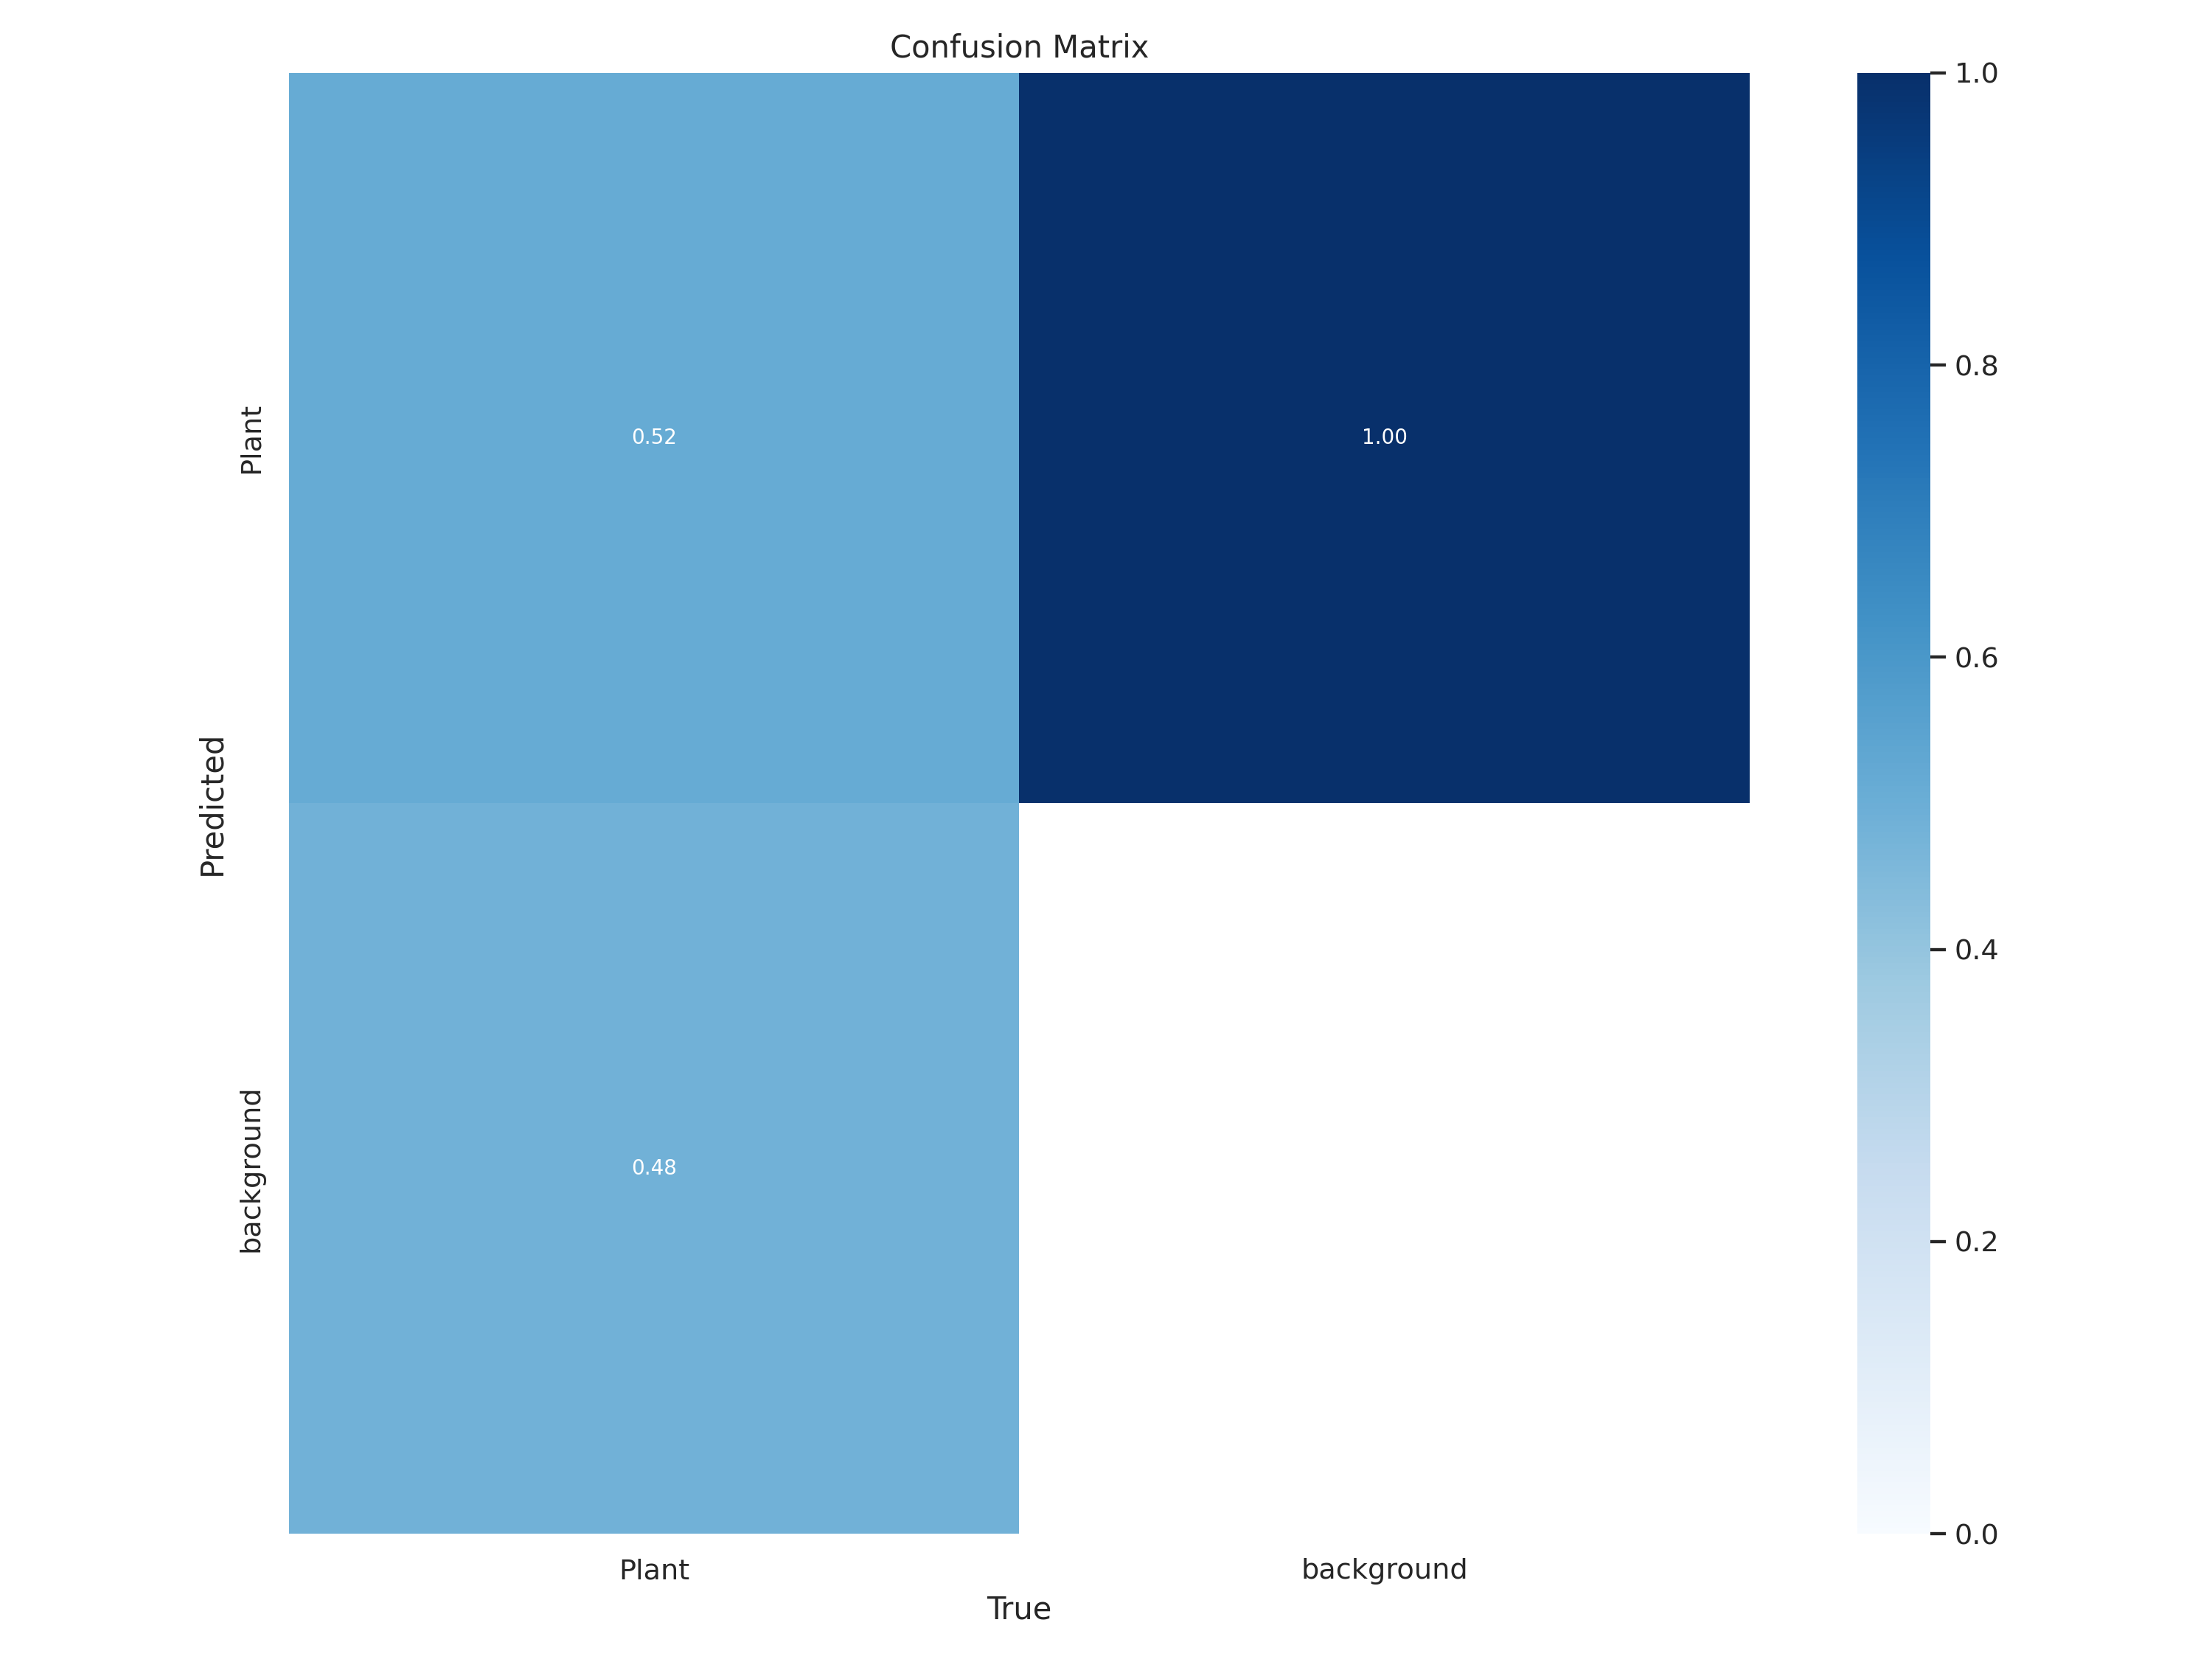

In [20]:
Image(filename='/content/runs/detect/val/confusion_matrix.png',width=600)

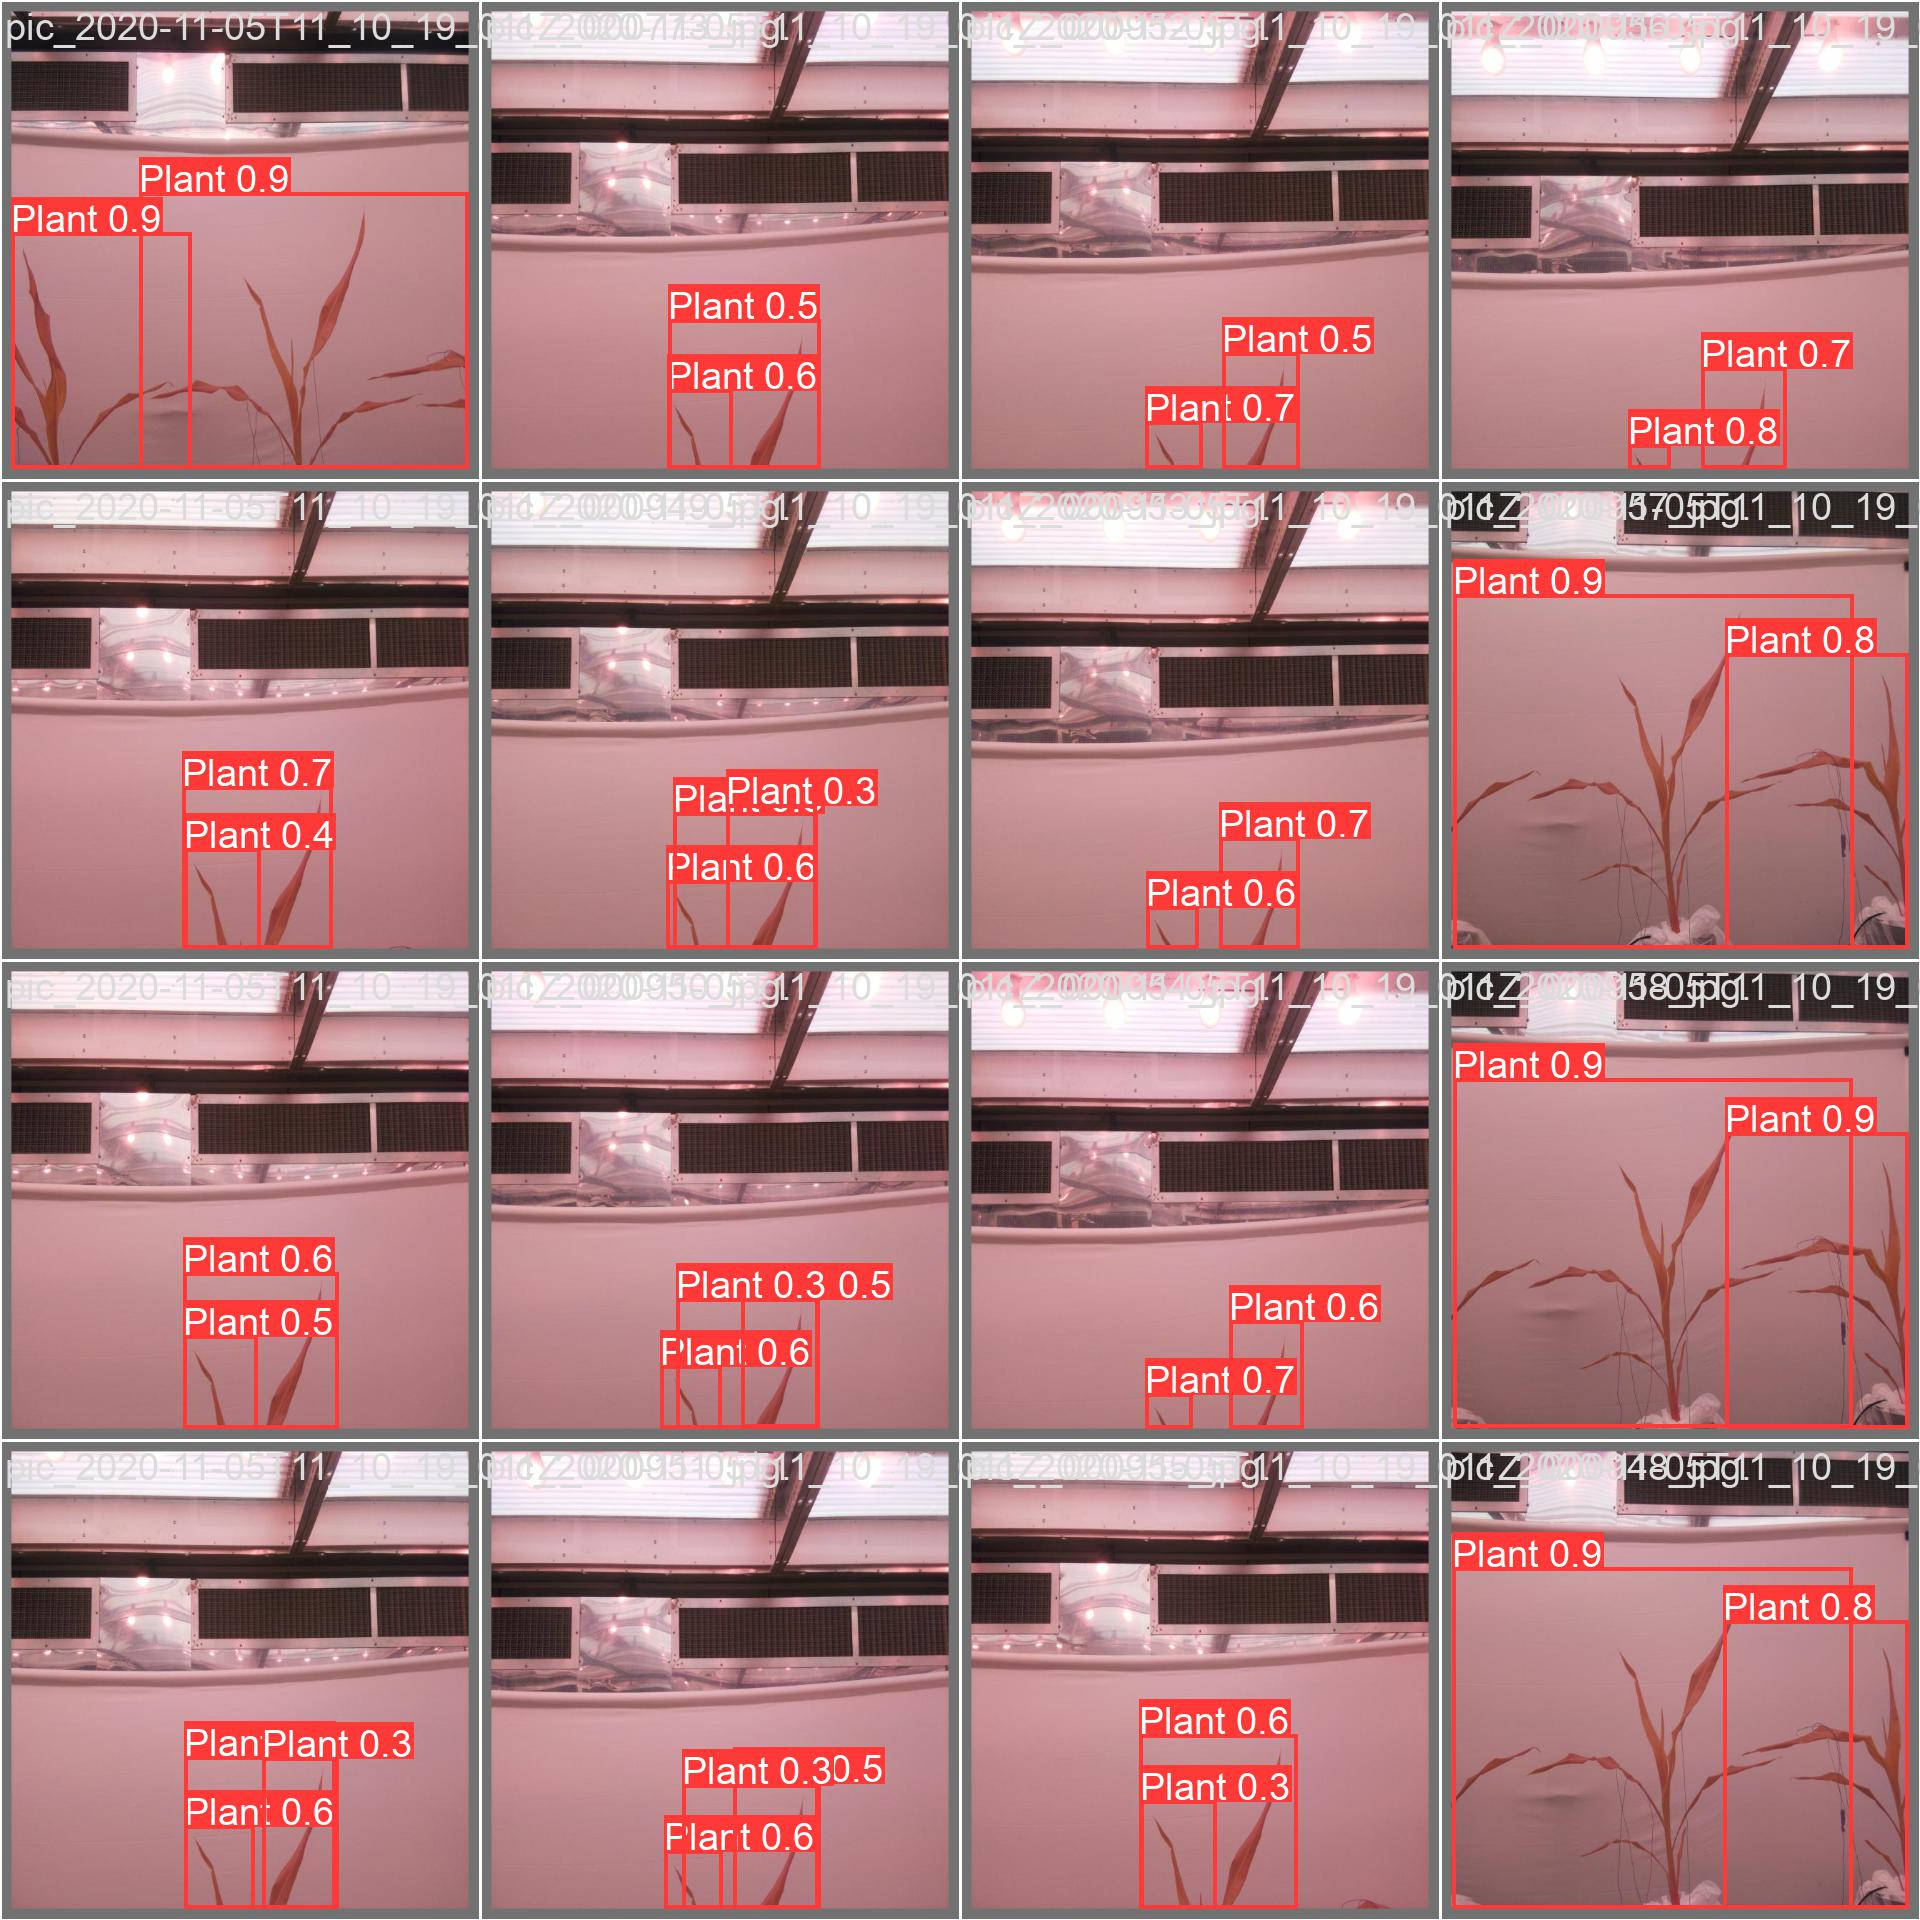

In [21]:
Image(filename='/content/runs/detect/val/val_batch0_pred.jpg',width=600)

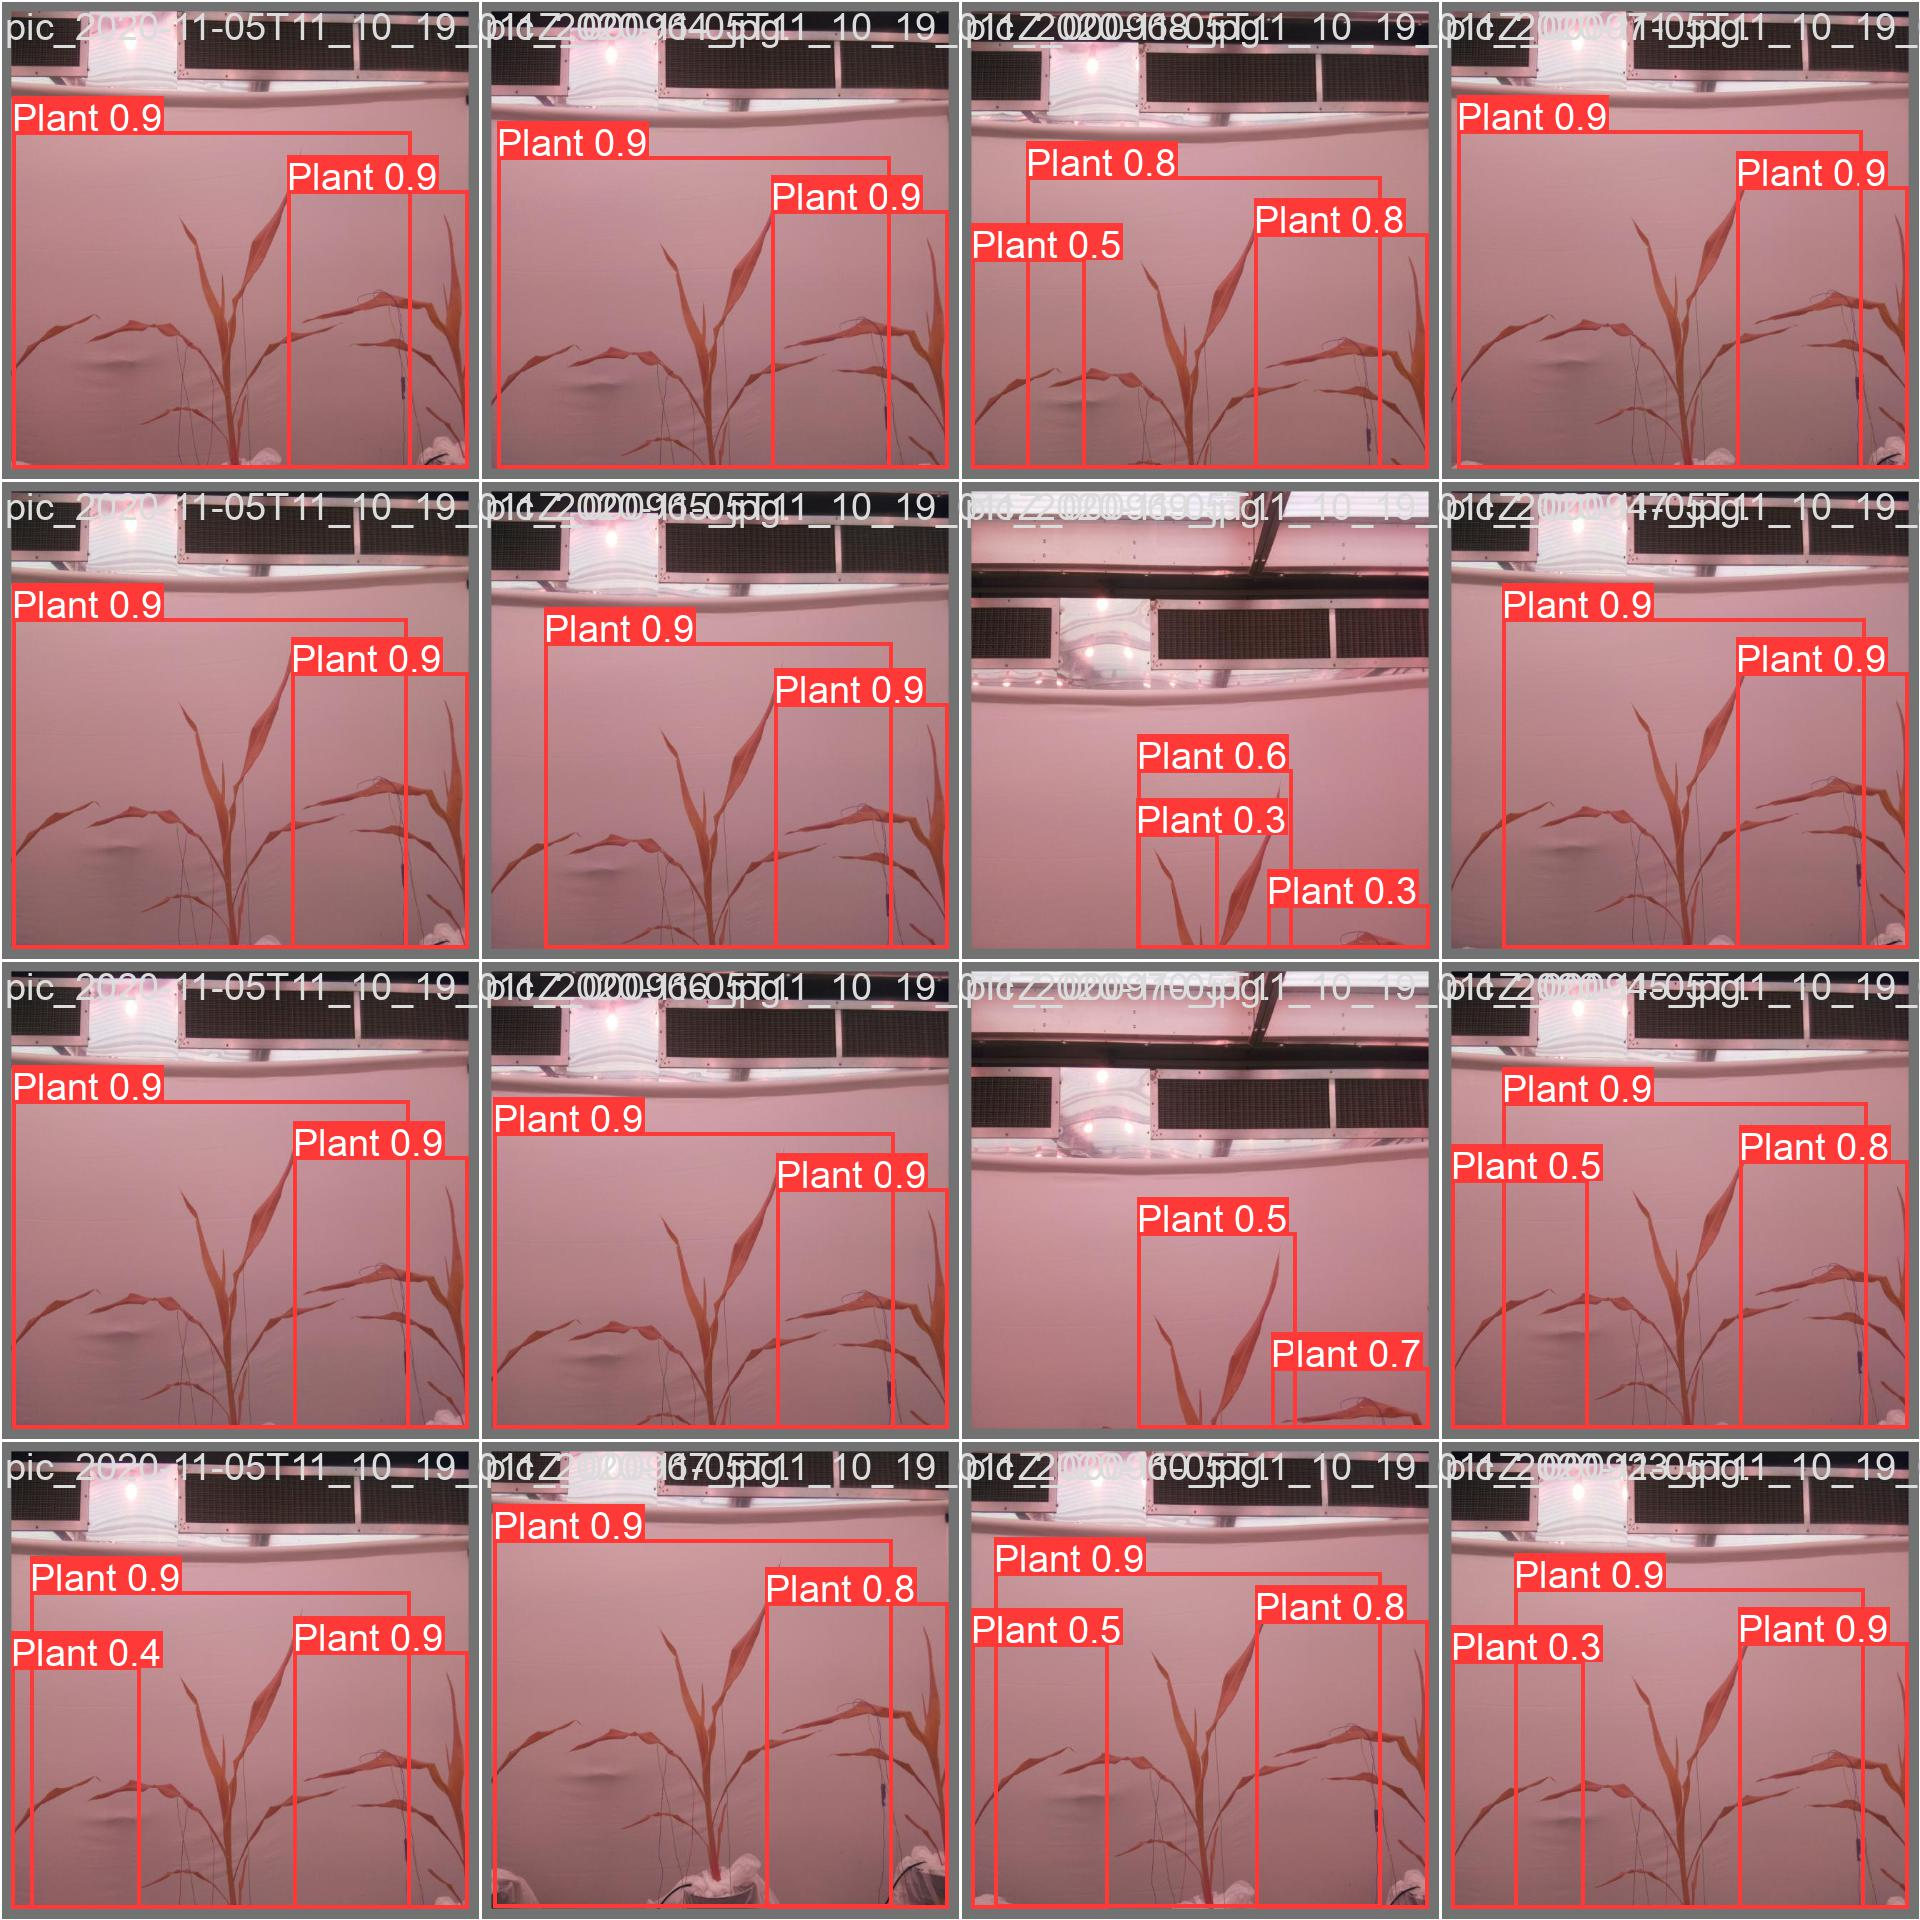

In [22]:
Image(filename='/content/runs/detect/val/val_batch1_pred.jpg',width=600)

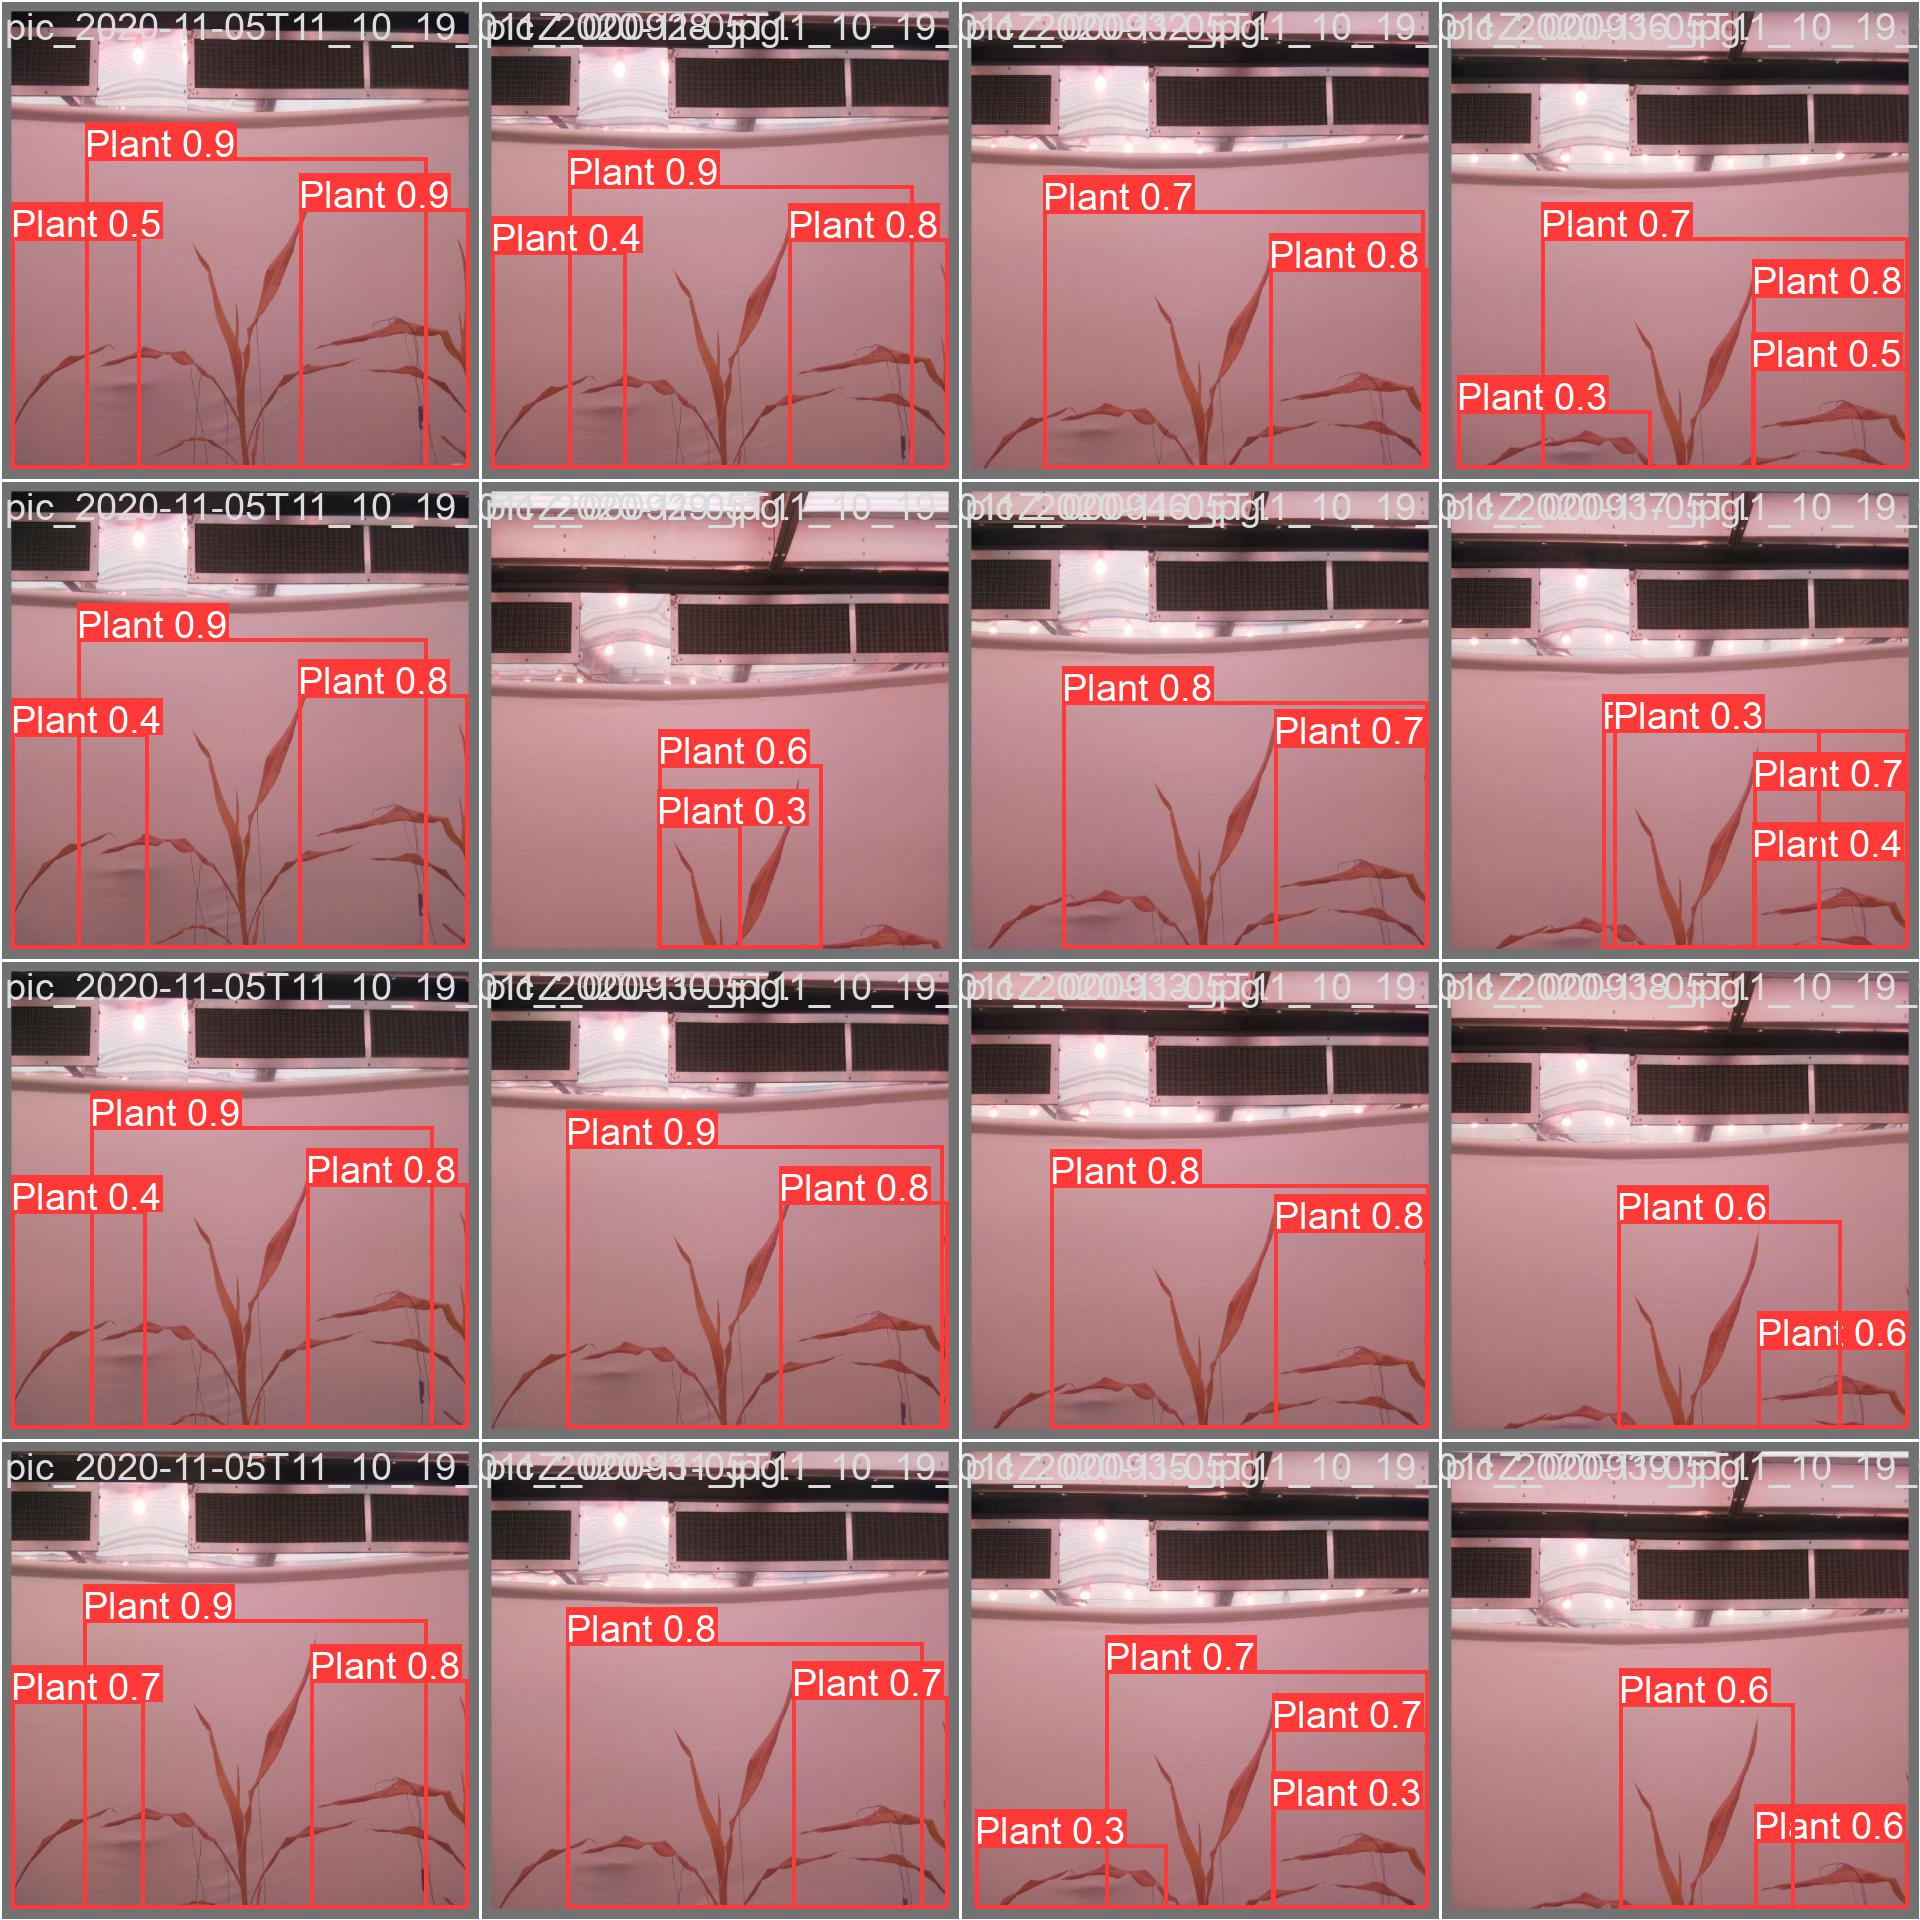

In [23]:
Image(filename='/content/runs/detect/val/val_batch2_pred.jpg',width=600)

In [14]:
model.predict('/content/yolov8n.pt',source='/content/Plant-finder-2/test/images/pic_2020-11-05T11_10_19_011Z_000681_jpg.rf.831fe403608502e606ab09cc672144aa.jpg',show=True)

TypeError: ignored

In [ ]:
!zip -r 'fili.zip' /content/runs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!cp -R '/content/runs' '/content/drive/yolo8runs'

In [ ]:
Image(filename='/content/runs/detect/val/F1_curve.png',width=600)

In [16]:
model = YOLO("/content/runs/detect/train/weights/last.pt")
model.train(data="/content/Plant-finder-2/data.yaml",epochs=150)  # train the model

New https://pypi.org/project/ultralytics/8.0.66 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.65 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/last.pt, data=/content/Plant-finder-2/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, a

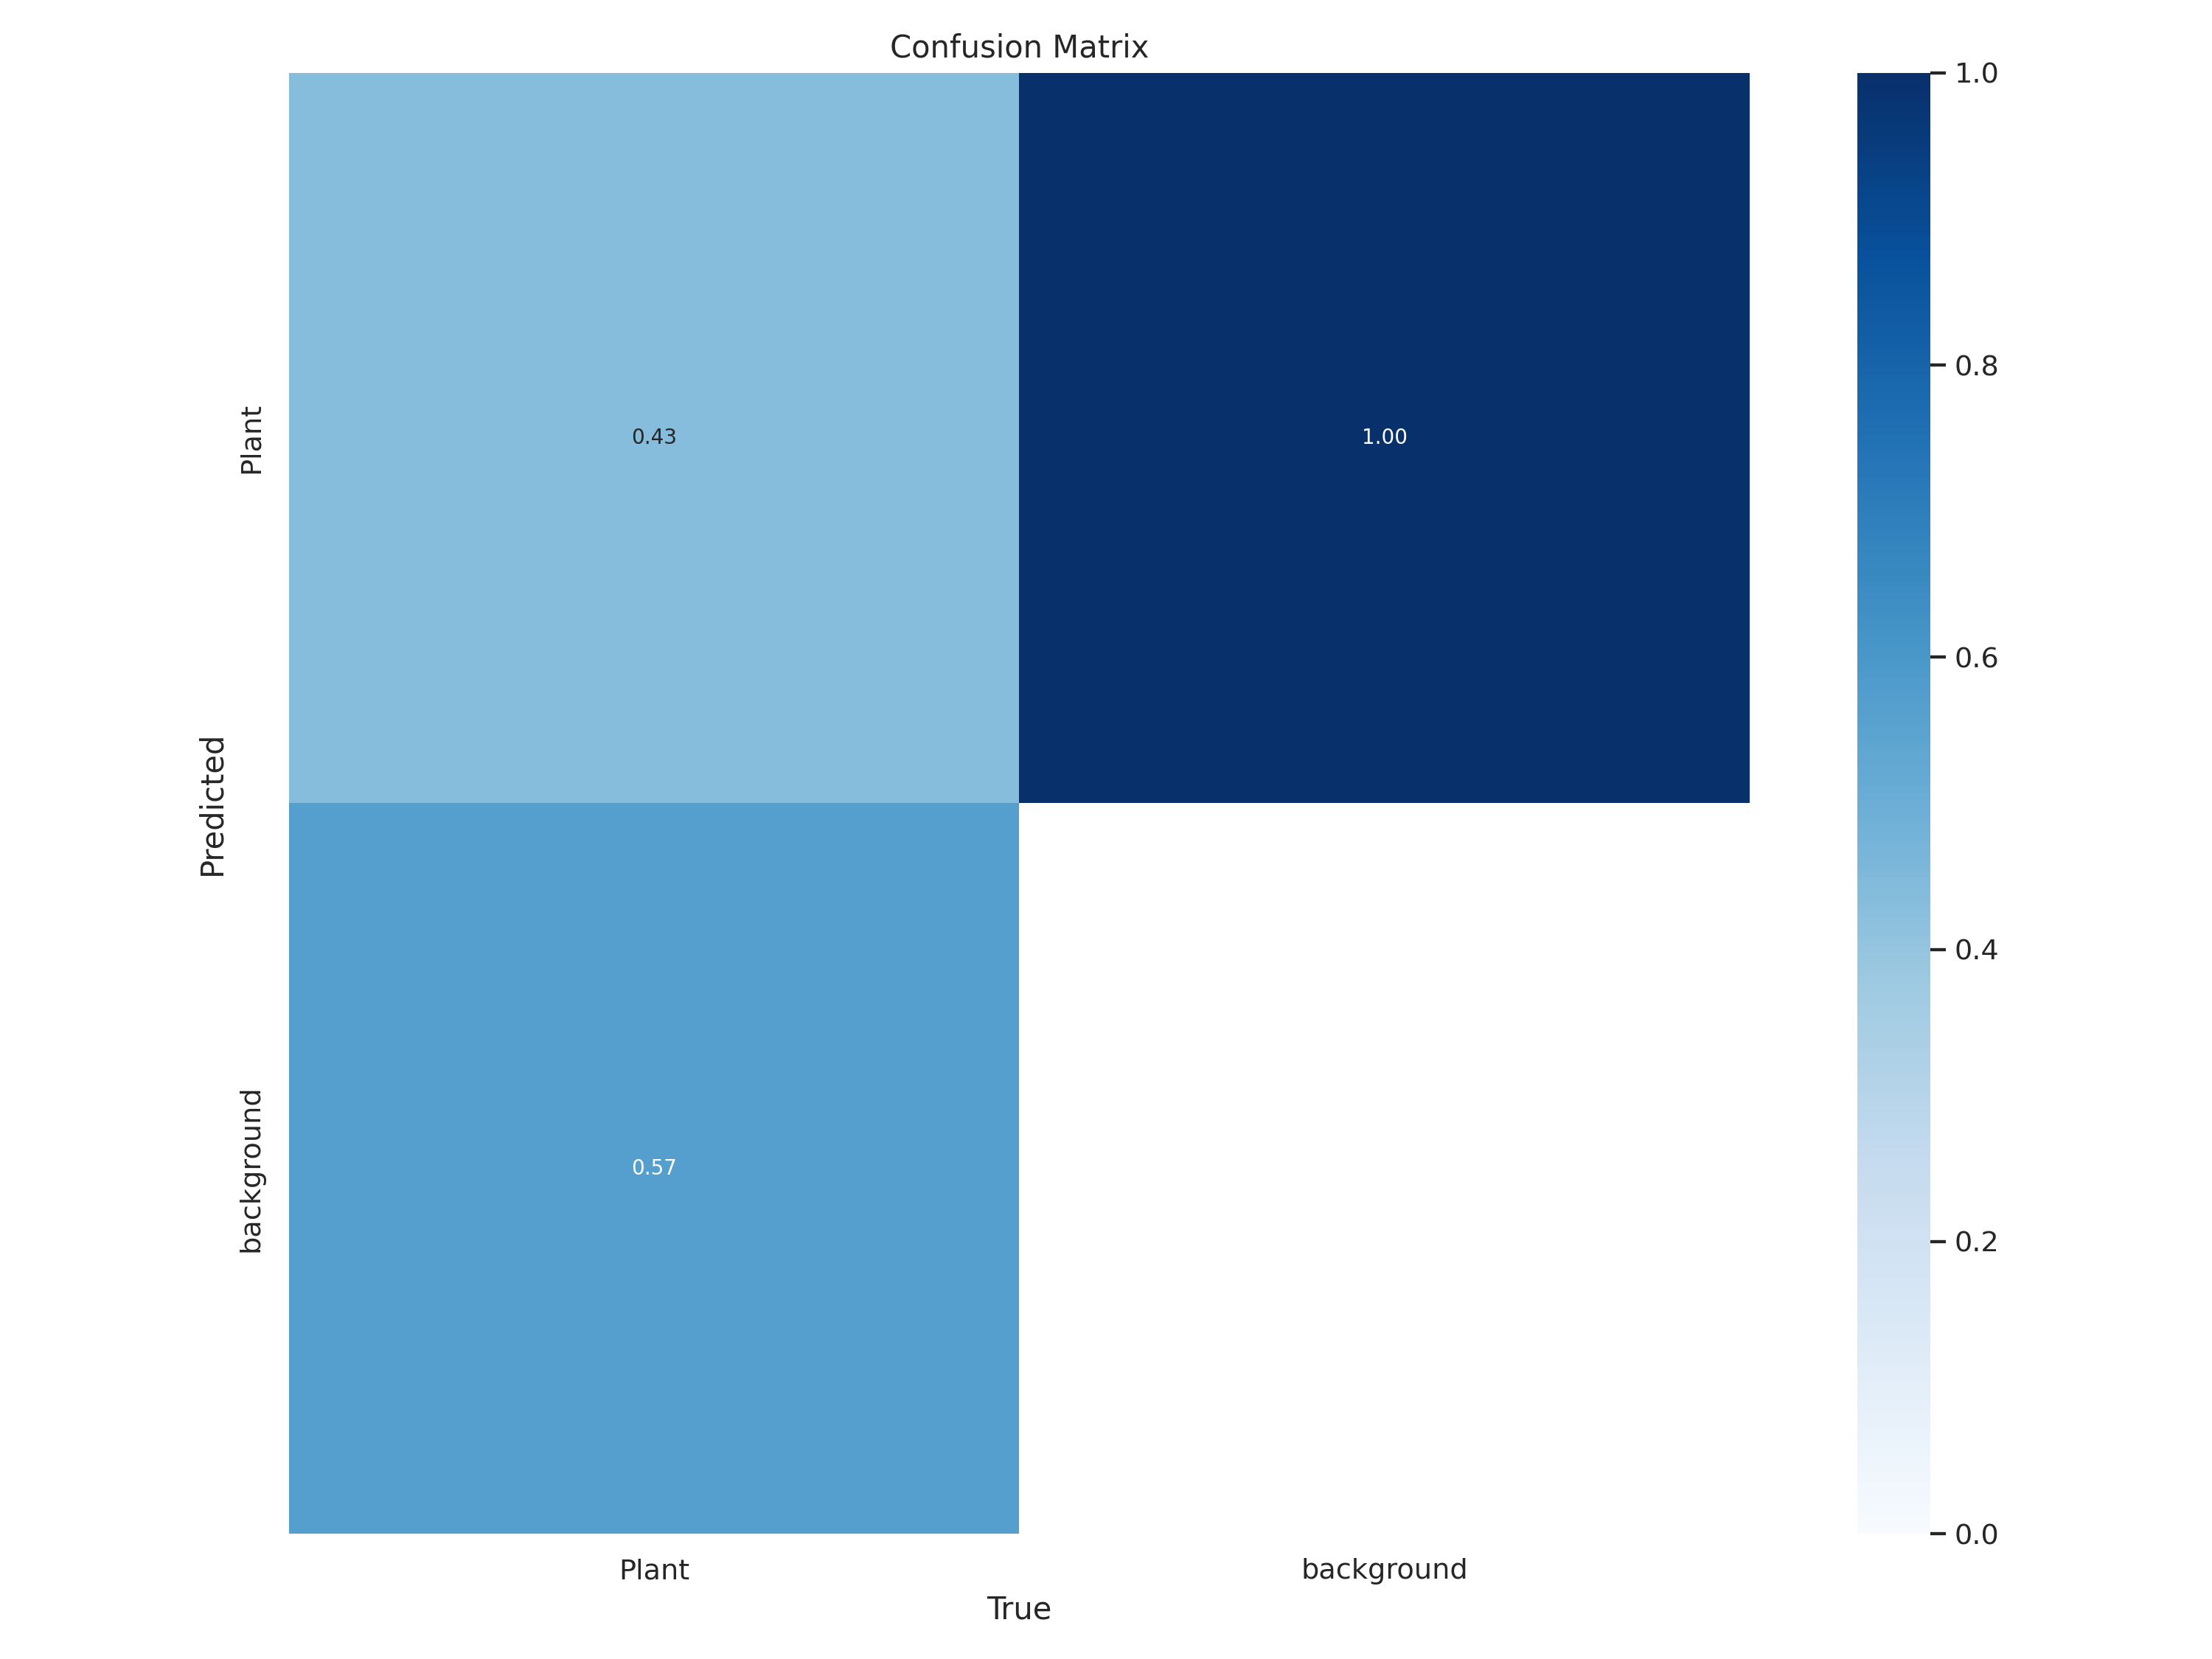

In [17]:
from IPython.display import display, Image
Image(filename='/content/runs/detect/train3/confusion_matrix.png',width=600)

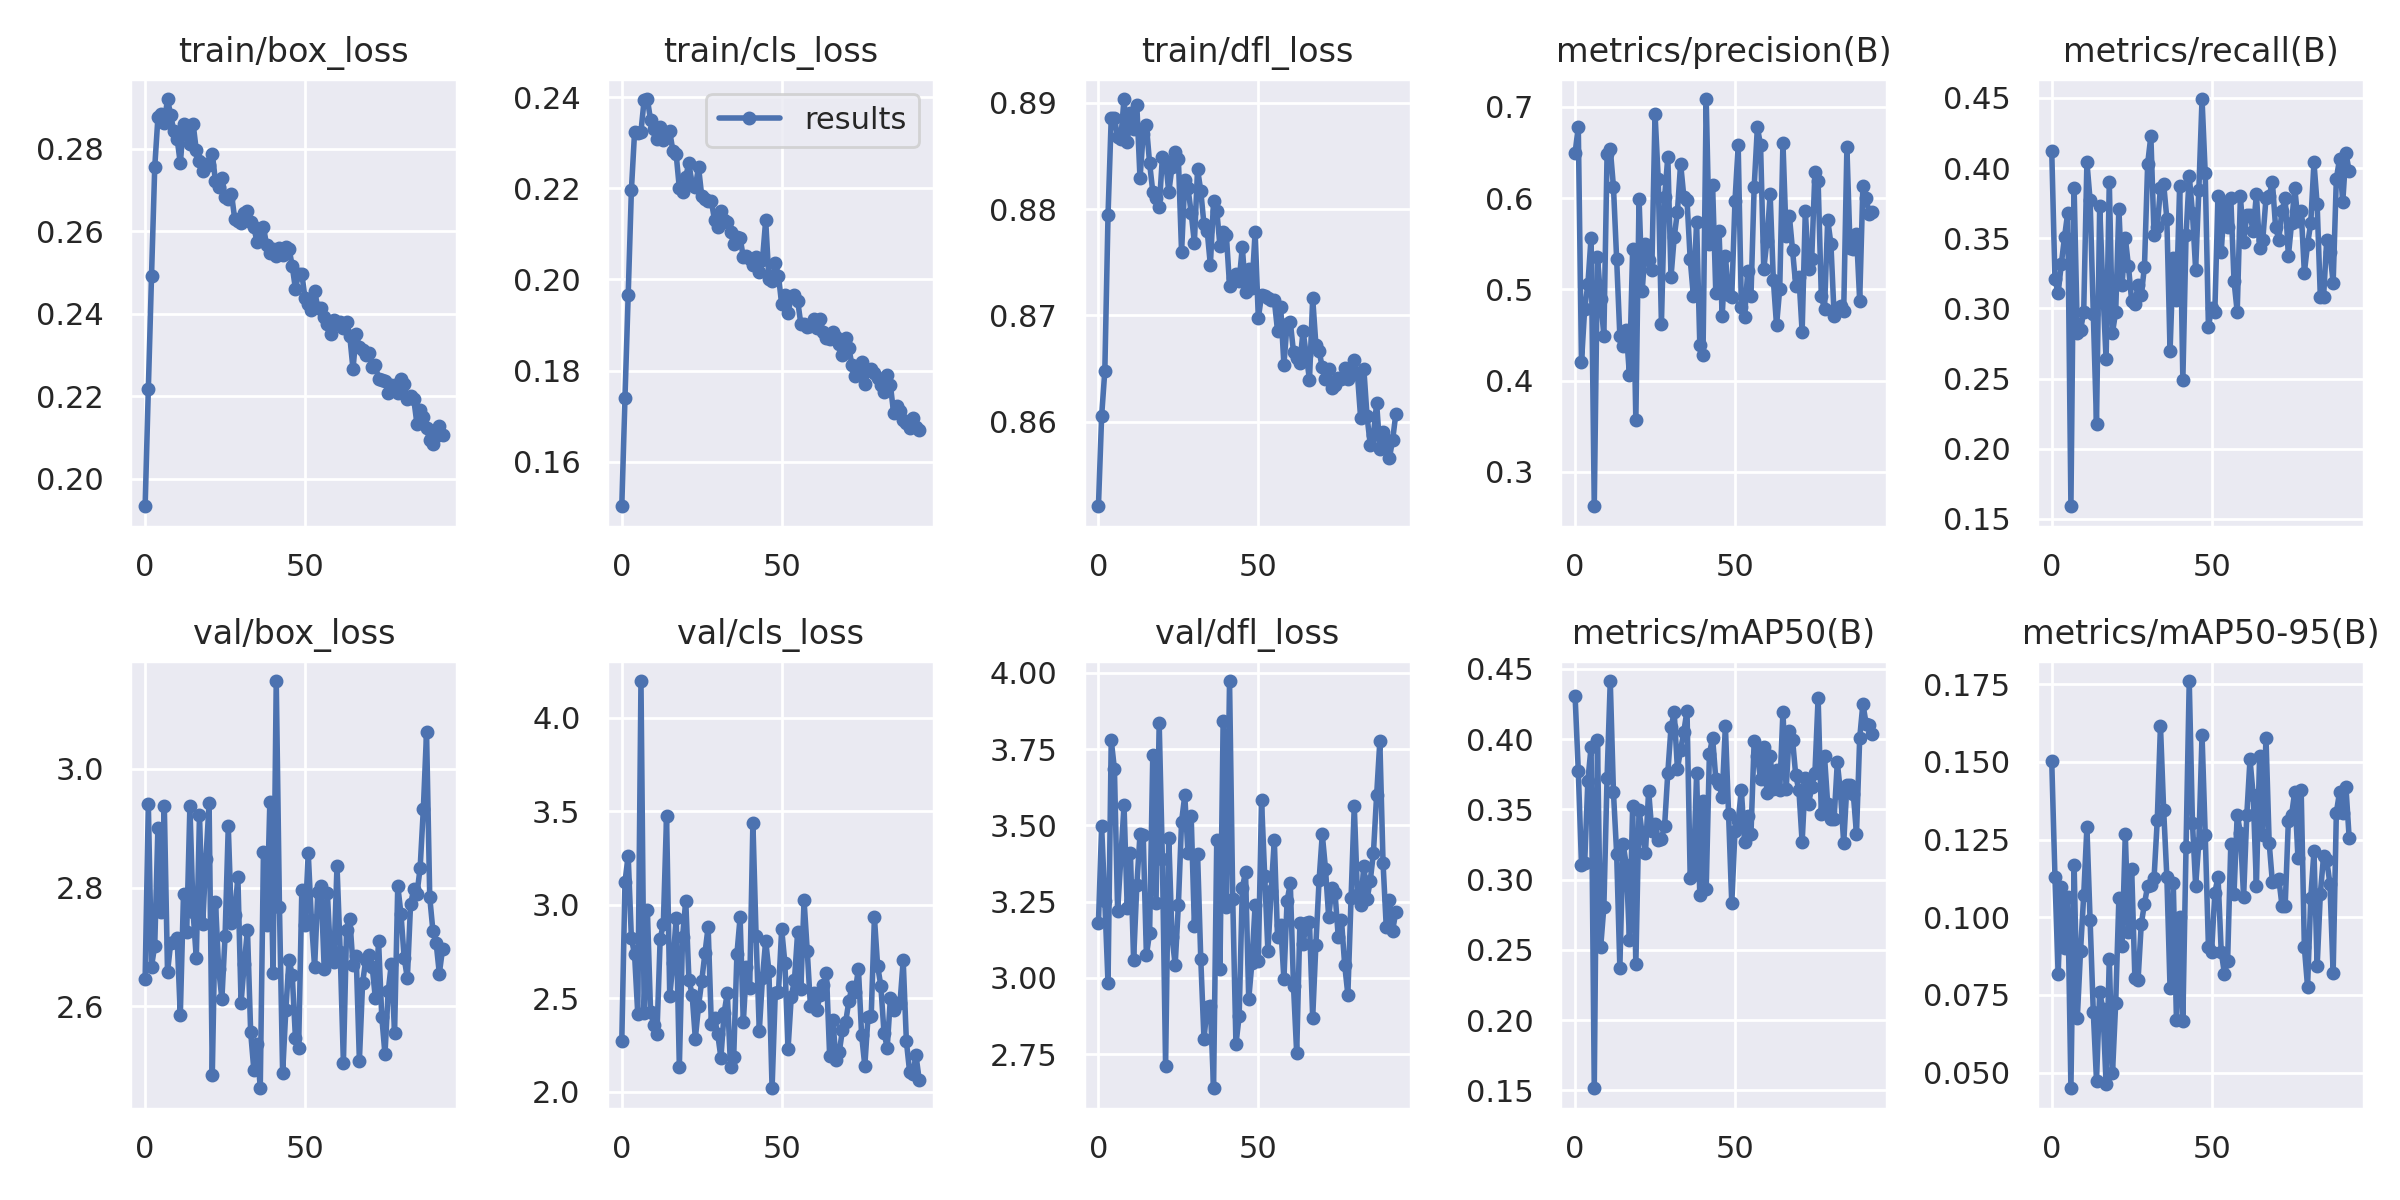

In [18]:
Image(filename='/content/runs/detect/train3/results.png',width=600)

In [19]:
metrics = model.val()
metrics

Ultralytics YOLOv8.0.65 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/Plant-finder-2/valid/labels.cache... 208 images, 0 backgrounds, 0 corrupt: 100%|██████████| 208/208 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:12<00:00,  1.03it/s]
                   all        208        679      0.607      0.402      0.406      0.177
Speed: 2.0ms preprocess, 35.6ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val2


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7fb500157b20>
fitness: 0.20002155487792067
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.17718])
names: {0: 'Plant'}
plot: True
results_dict: {'metrics/precision(B)': 0.6072096159877513, 'metrics/recall(B)': 0.4020618556701031, 'metrics/mAP50(B)': 0.40555631148877436, 'metrics/mAP50-95(B)': 0.17718435969893692, 'fitness': 0.20002155487792067}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 1.9992865048922026, 'inference': 35.596675597704376, 'loss': 0.001338812021108774, 'postprocess': 2.6698467823175287}

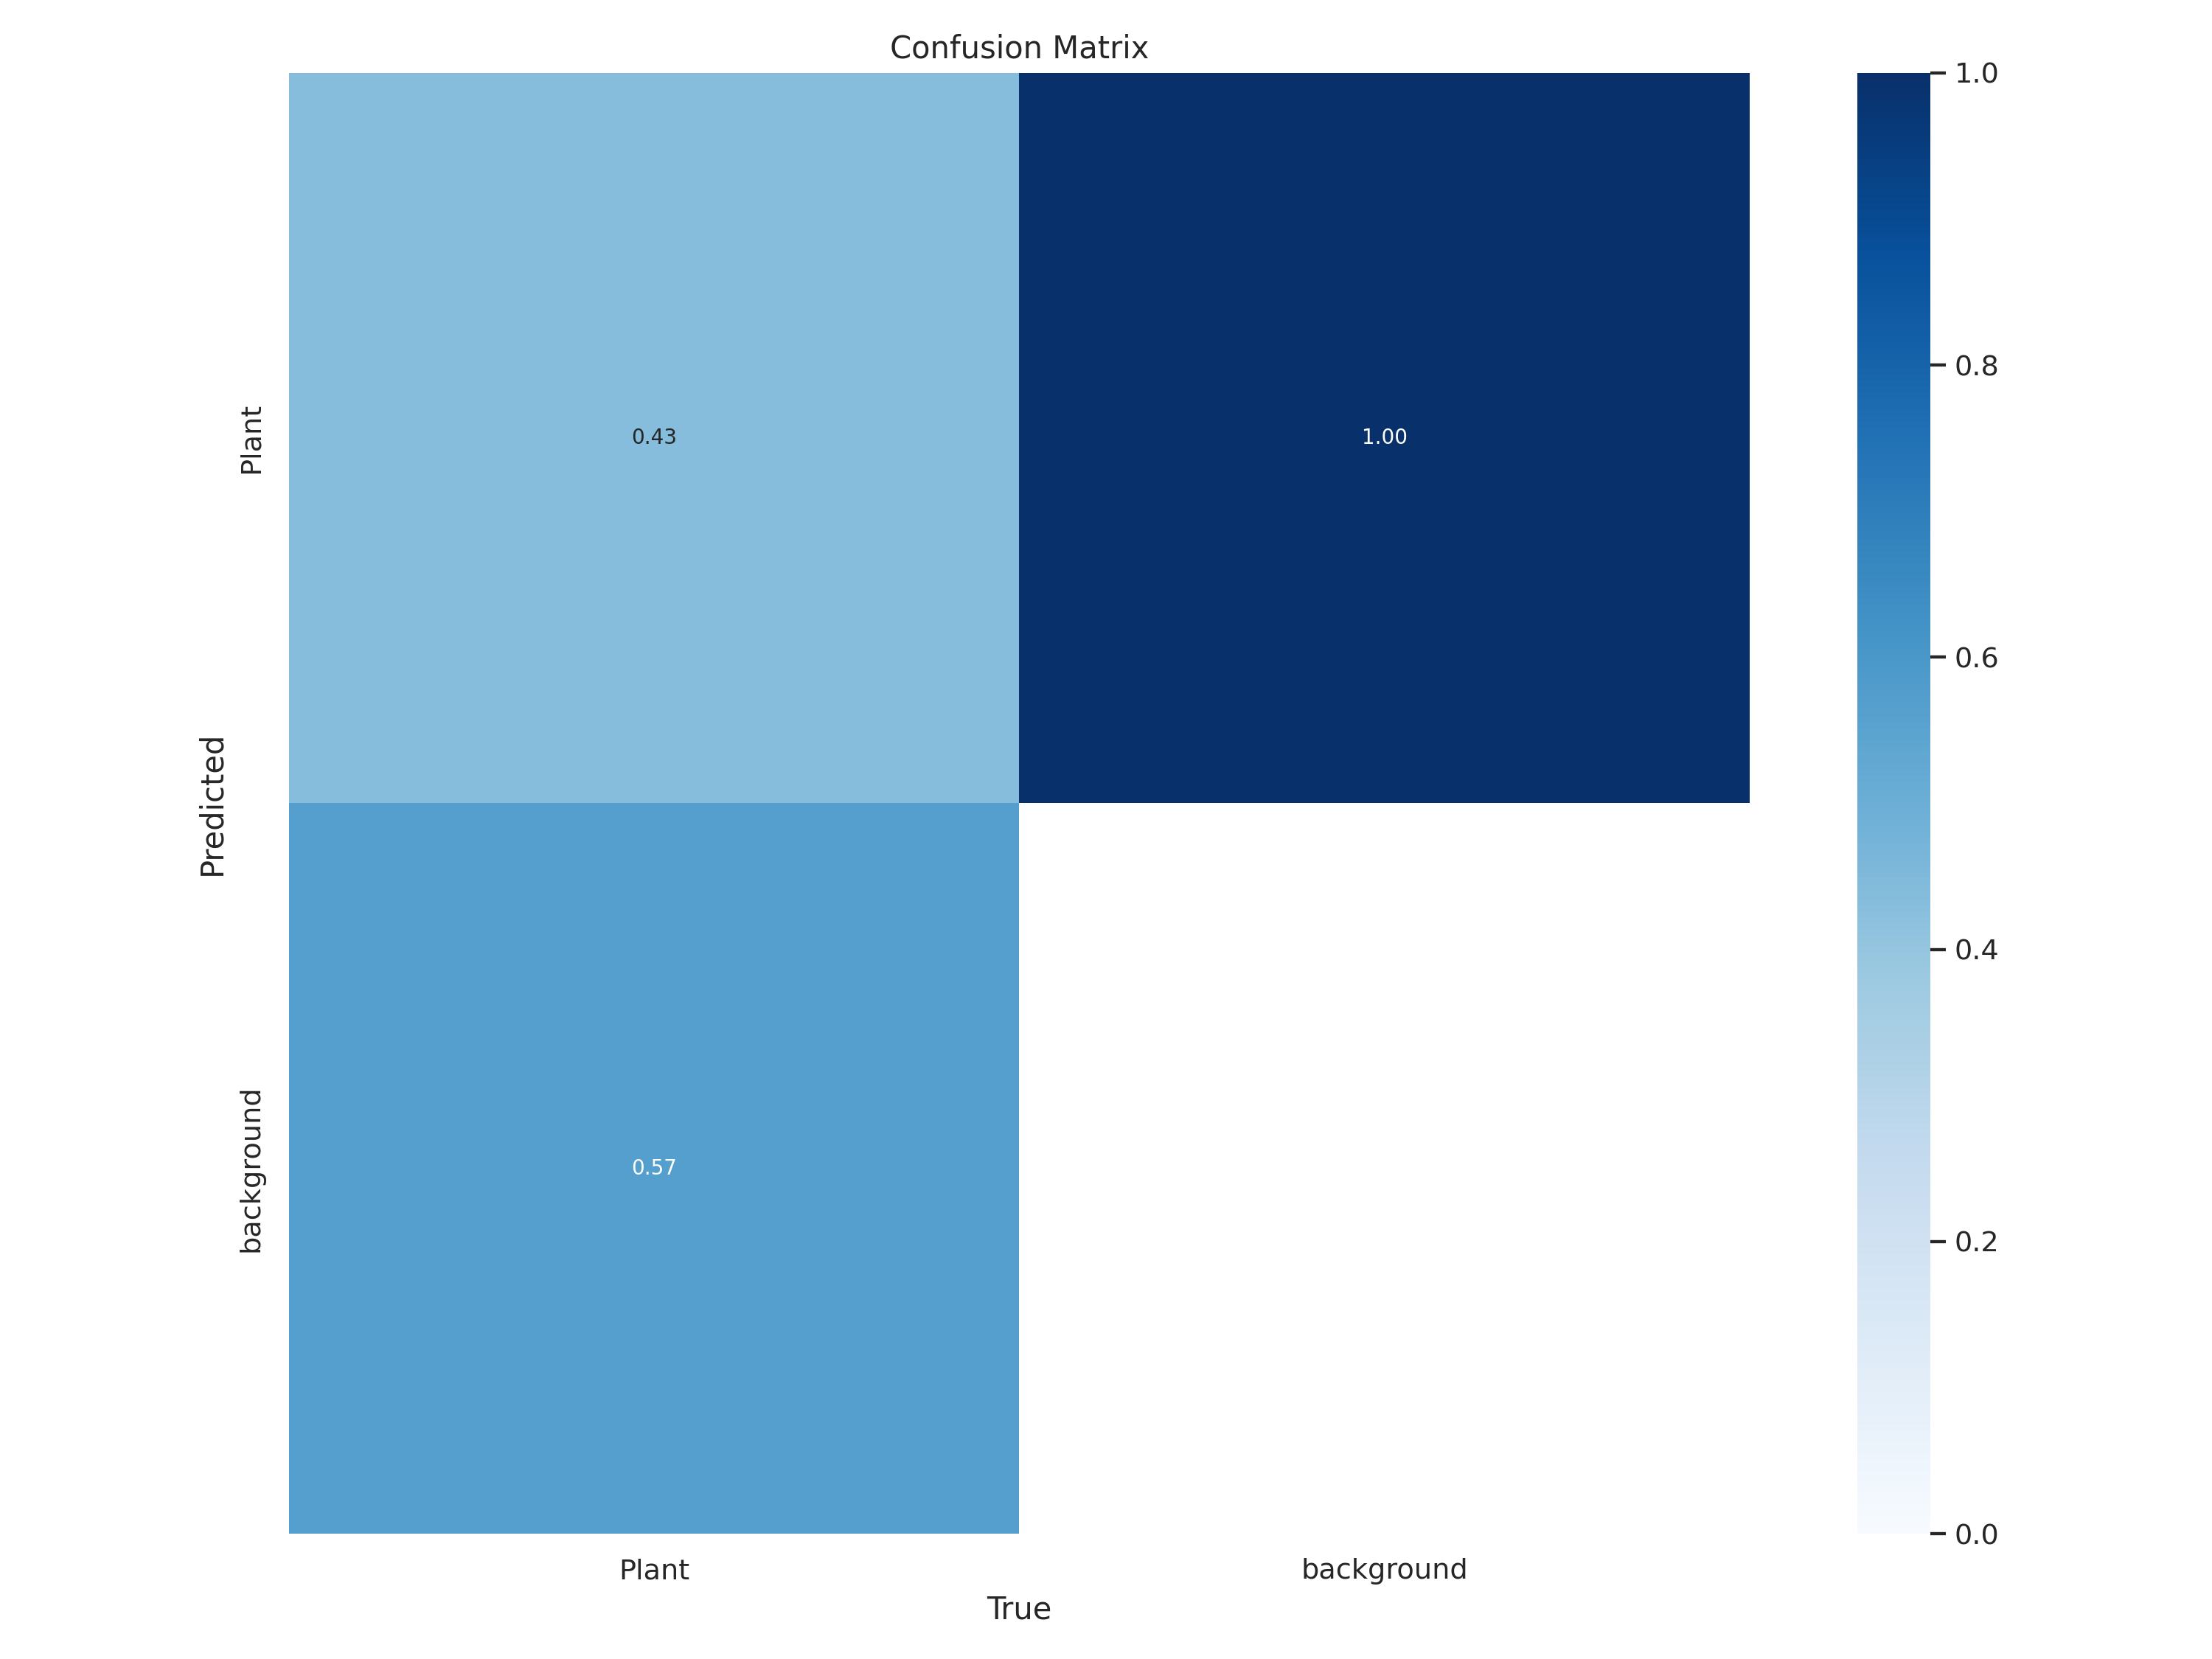

In [25]:
Image(filename='/content/runs/detect/val2/confusion_matrix.png',width=600)

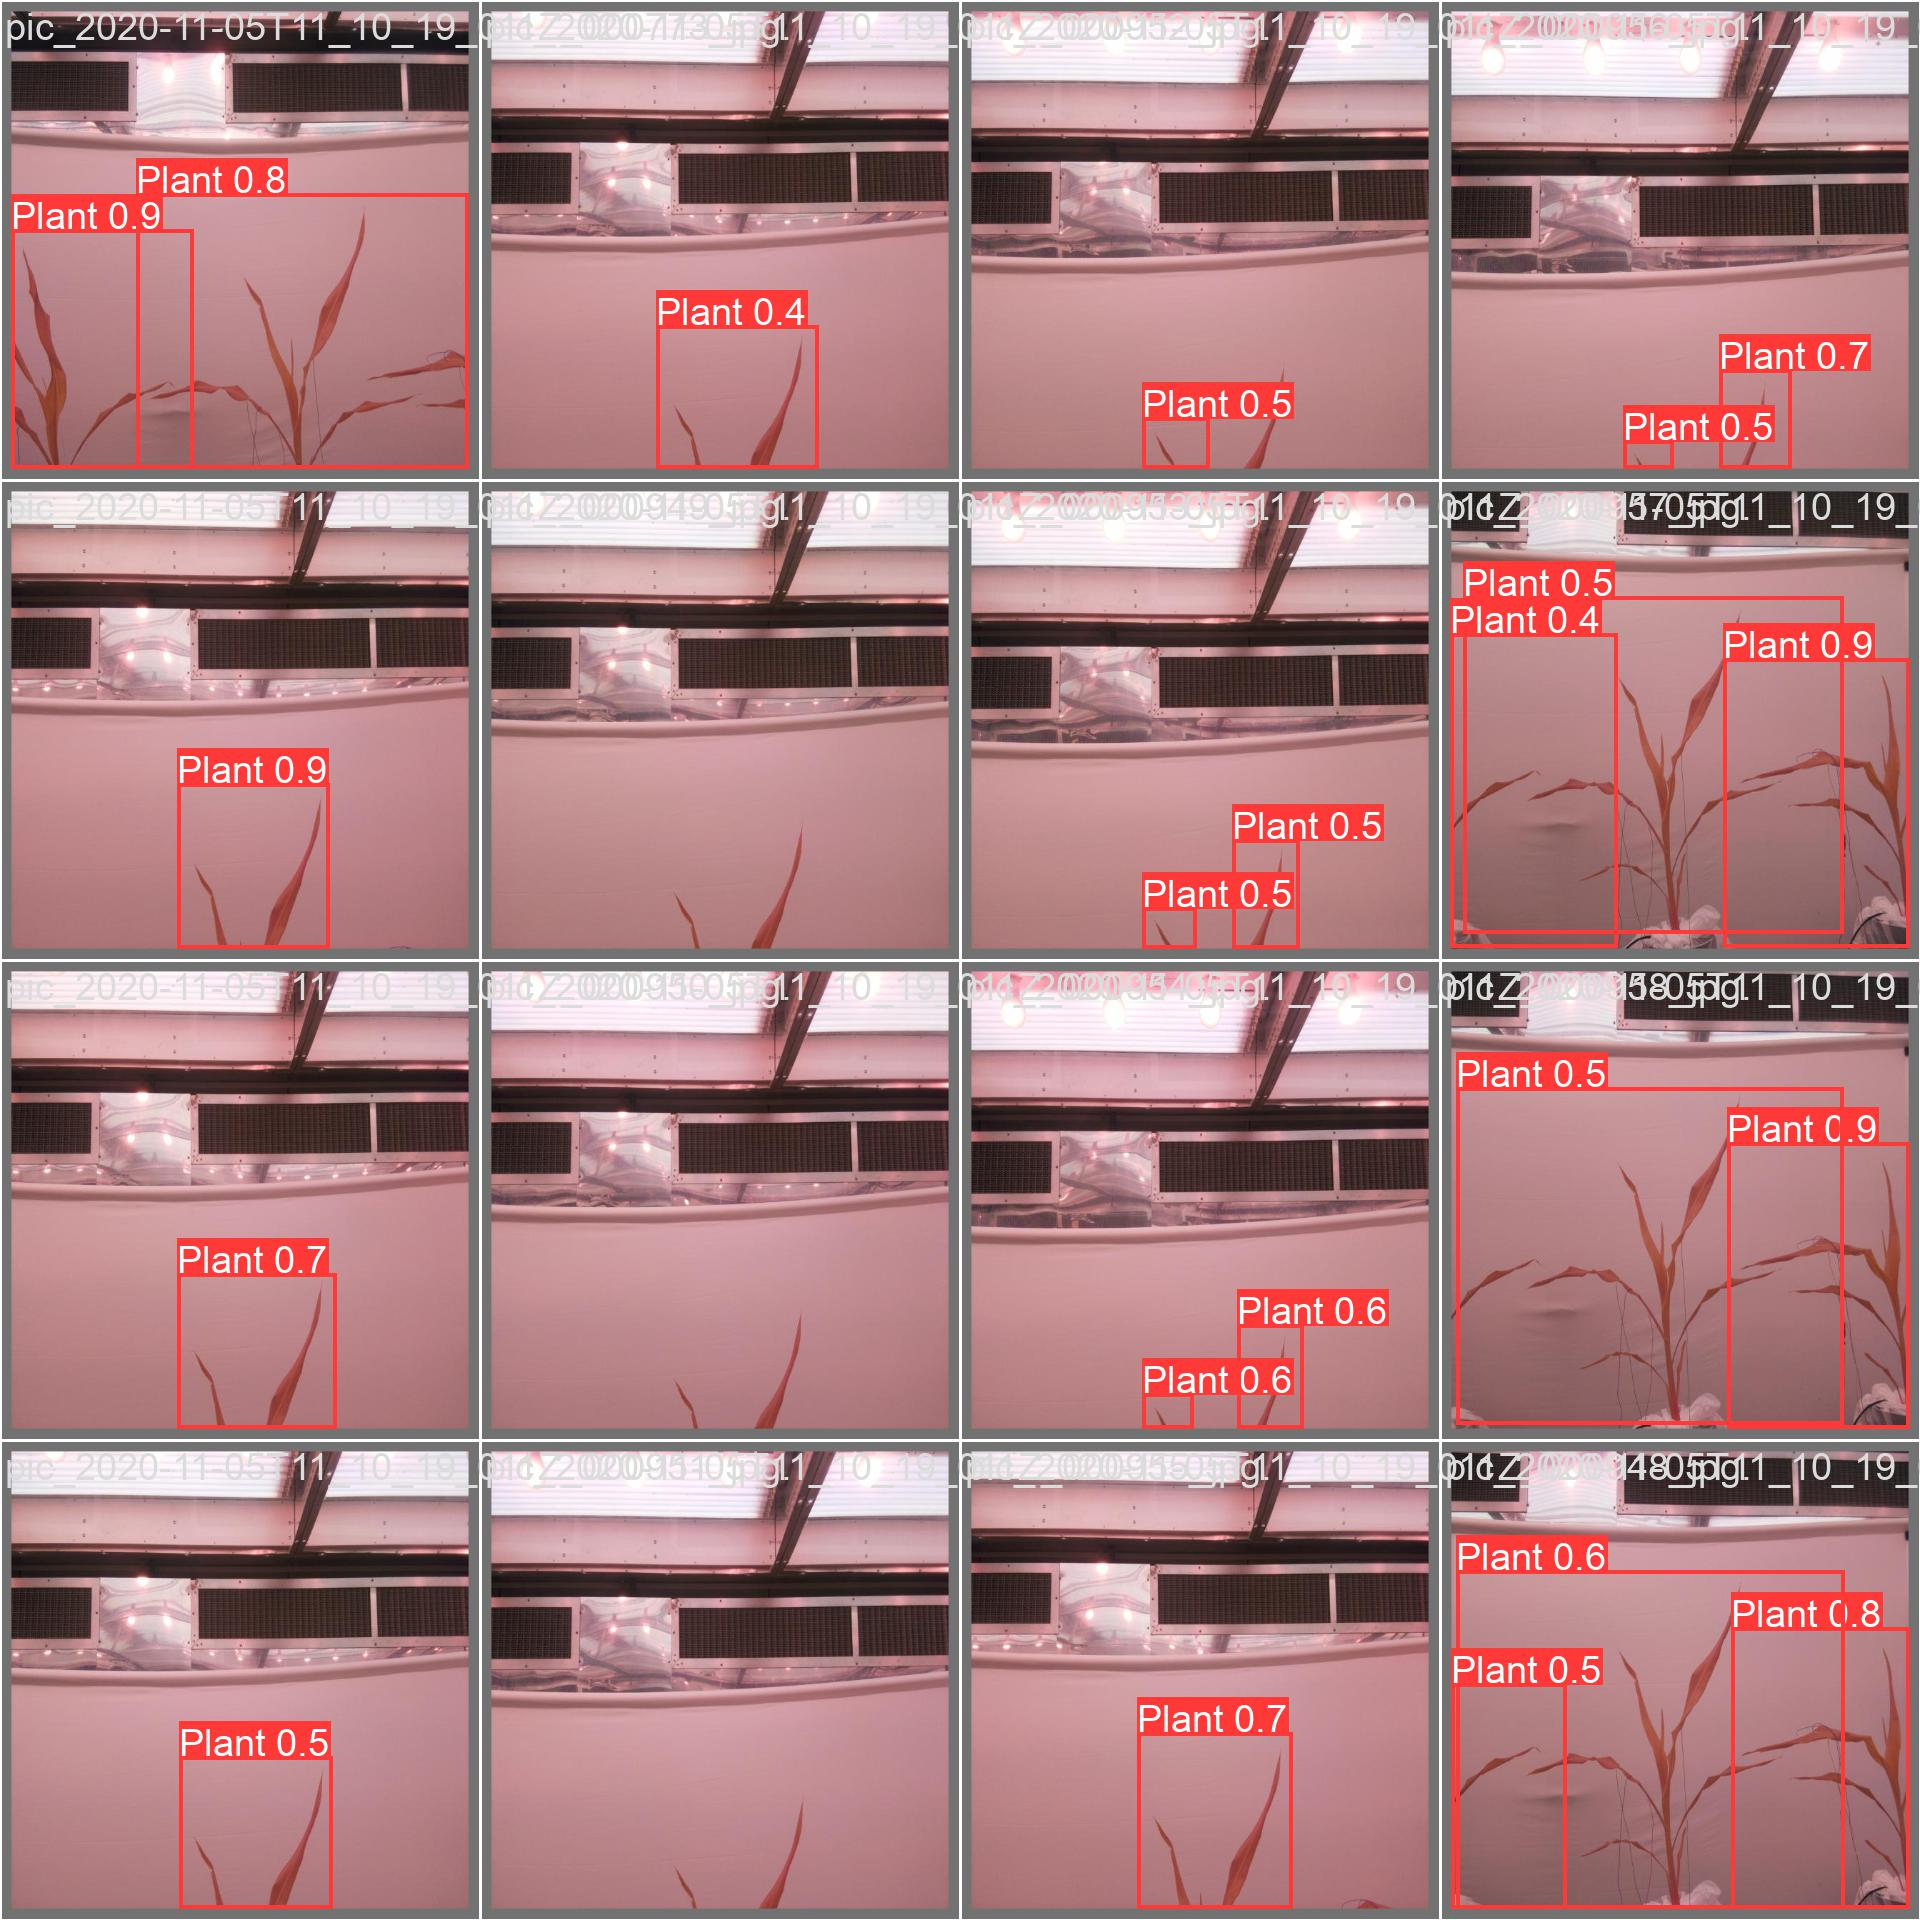

In [26]:
Image(filename='/content/runs/detect/val2/val_batch0_pred.jpg',width=600)

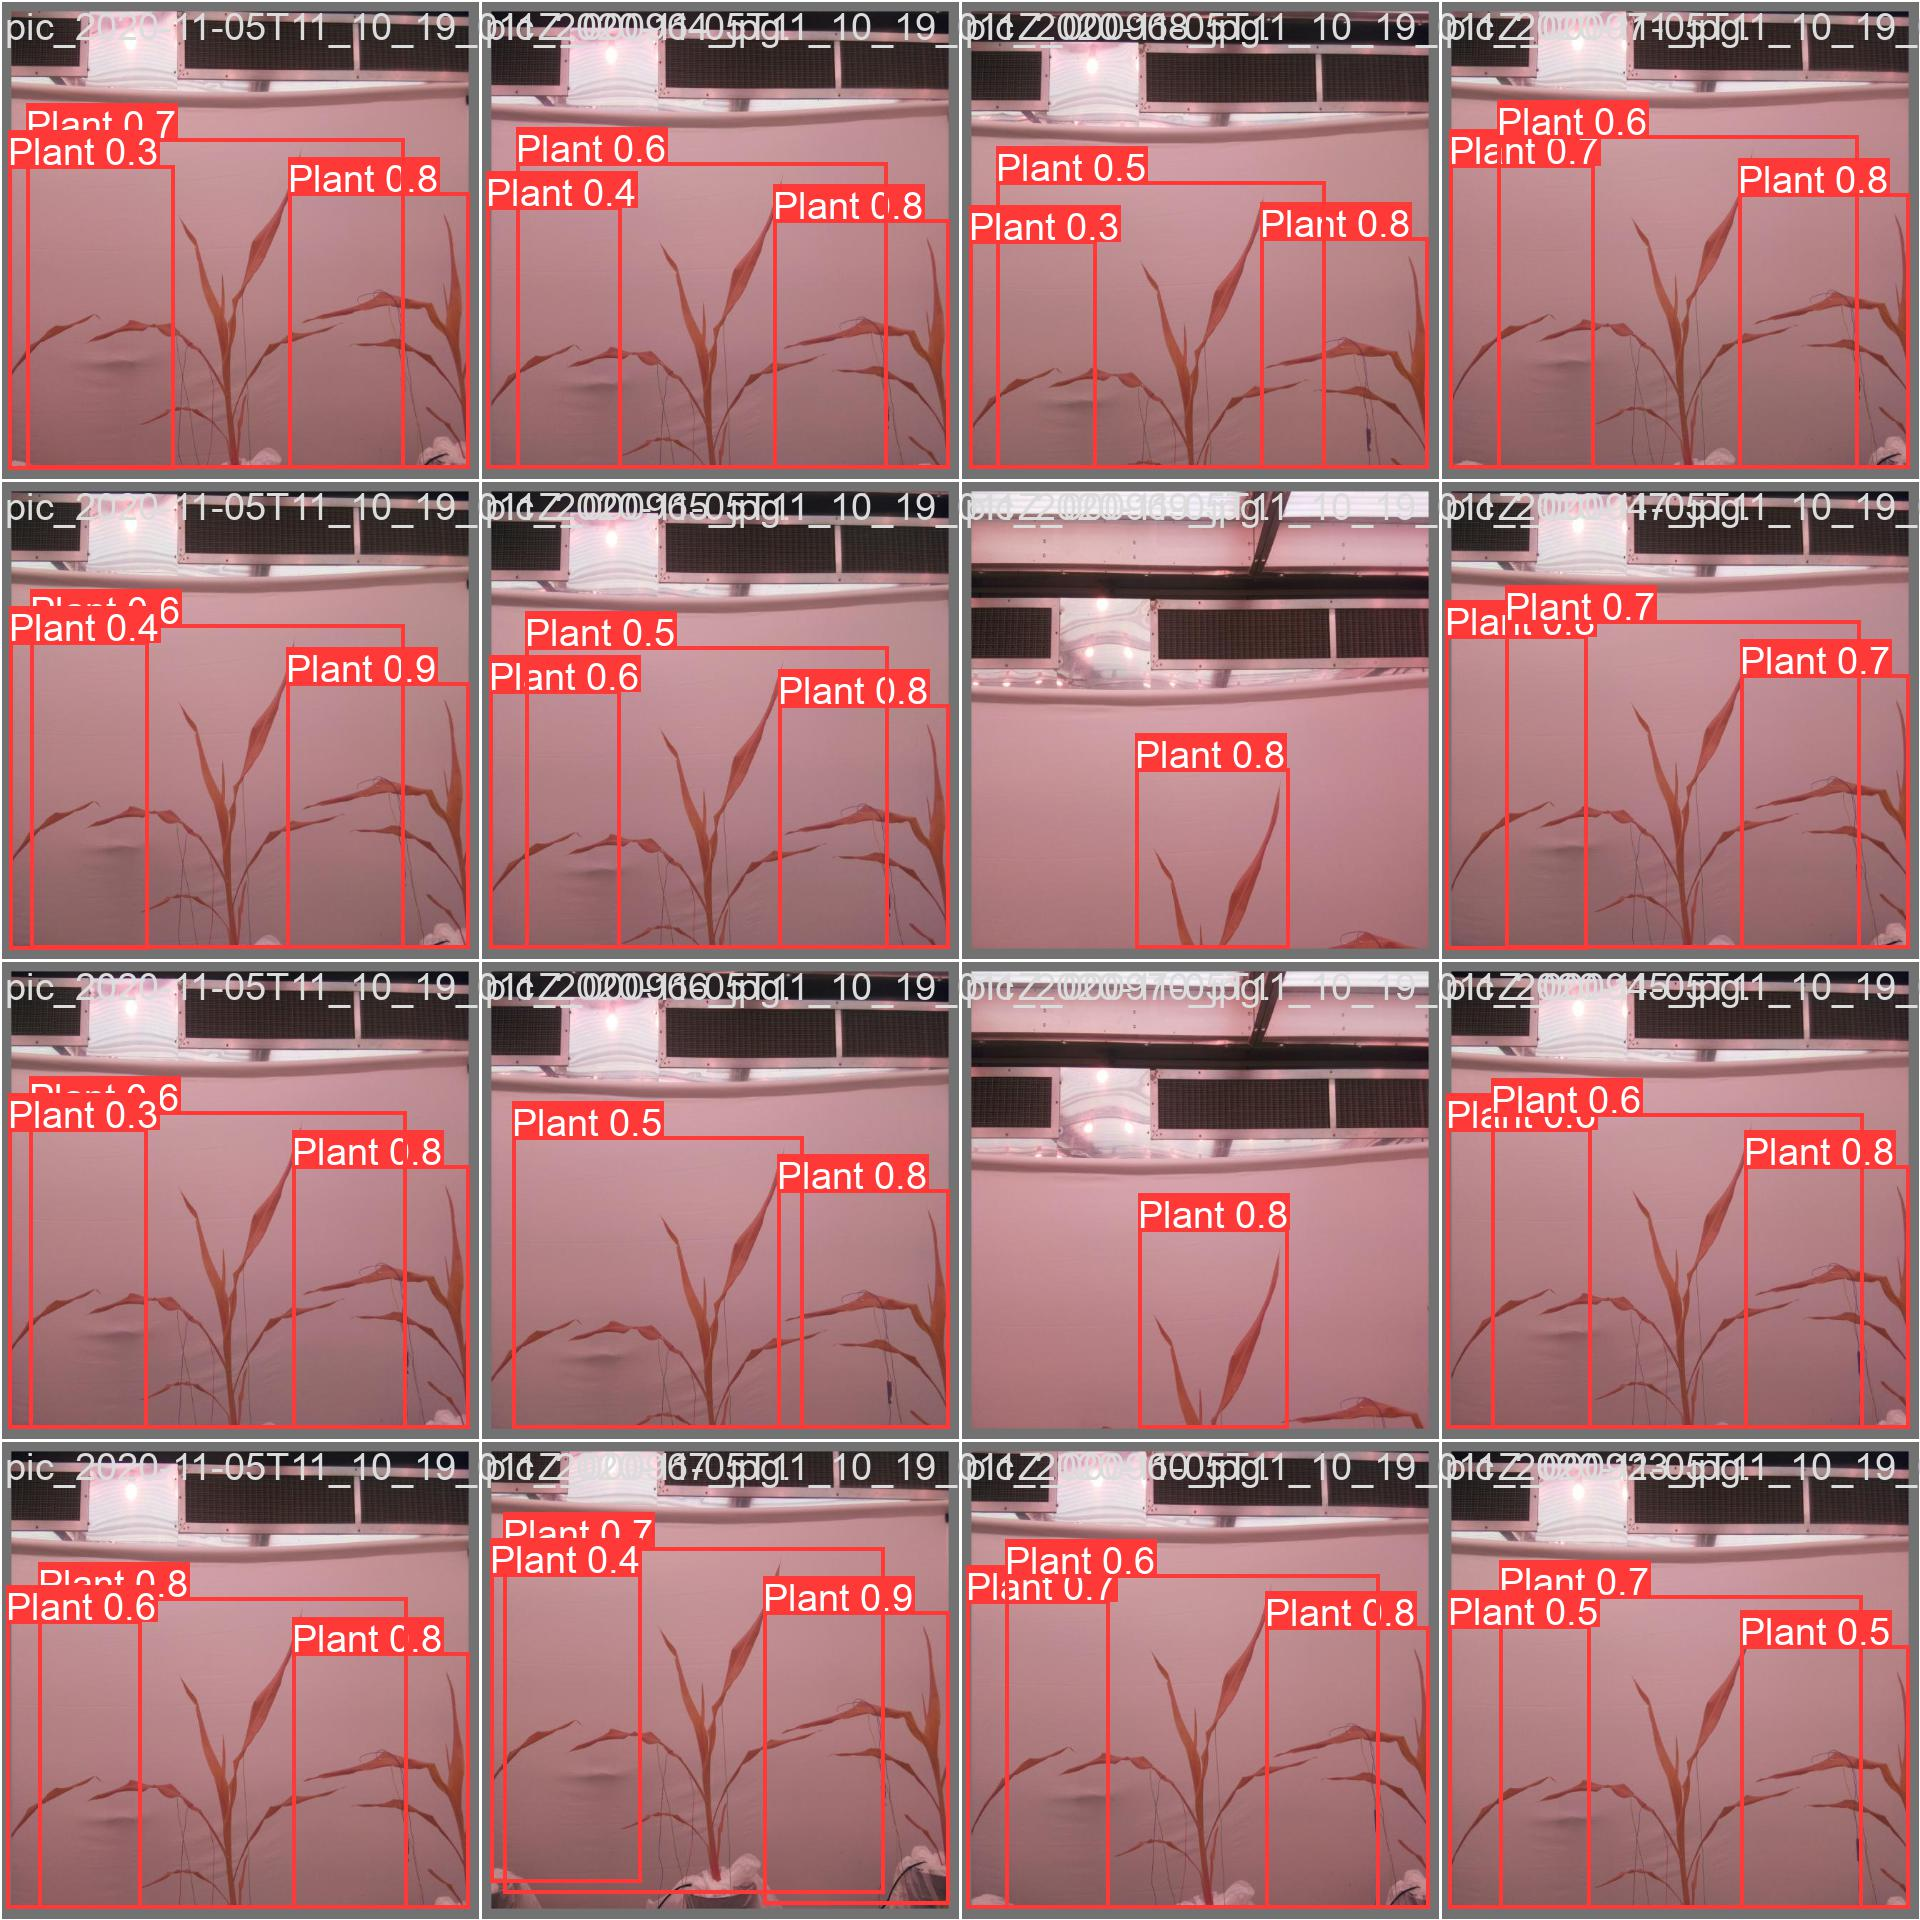

In [27]:
Image(filename='/content/runs/detect/val2/val_batch1_pred.jpg',width=600)

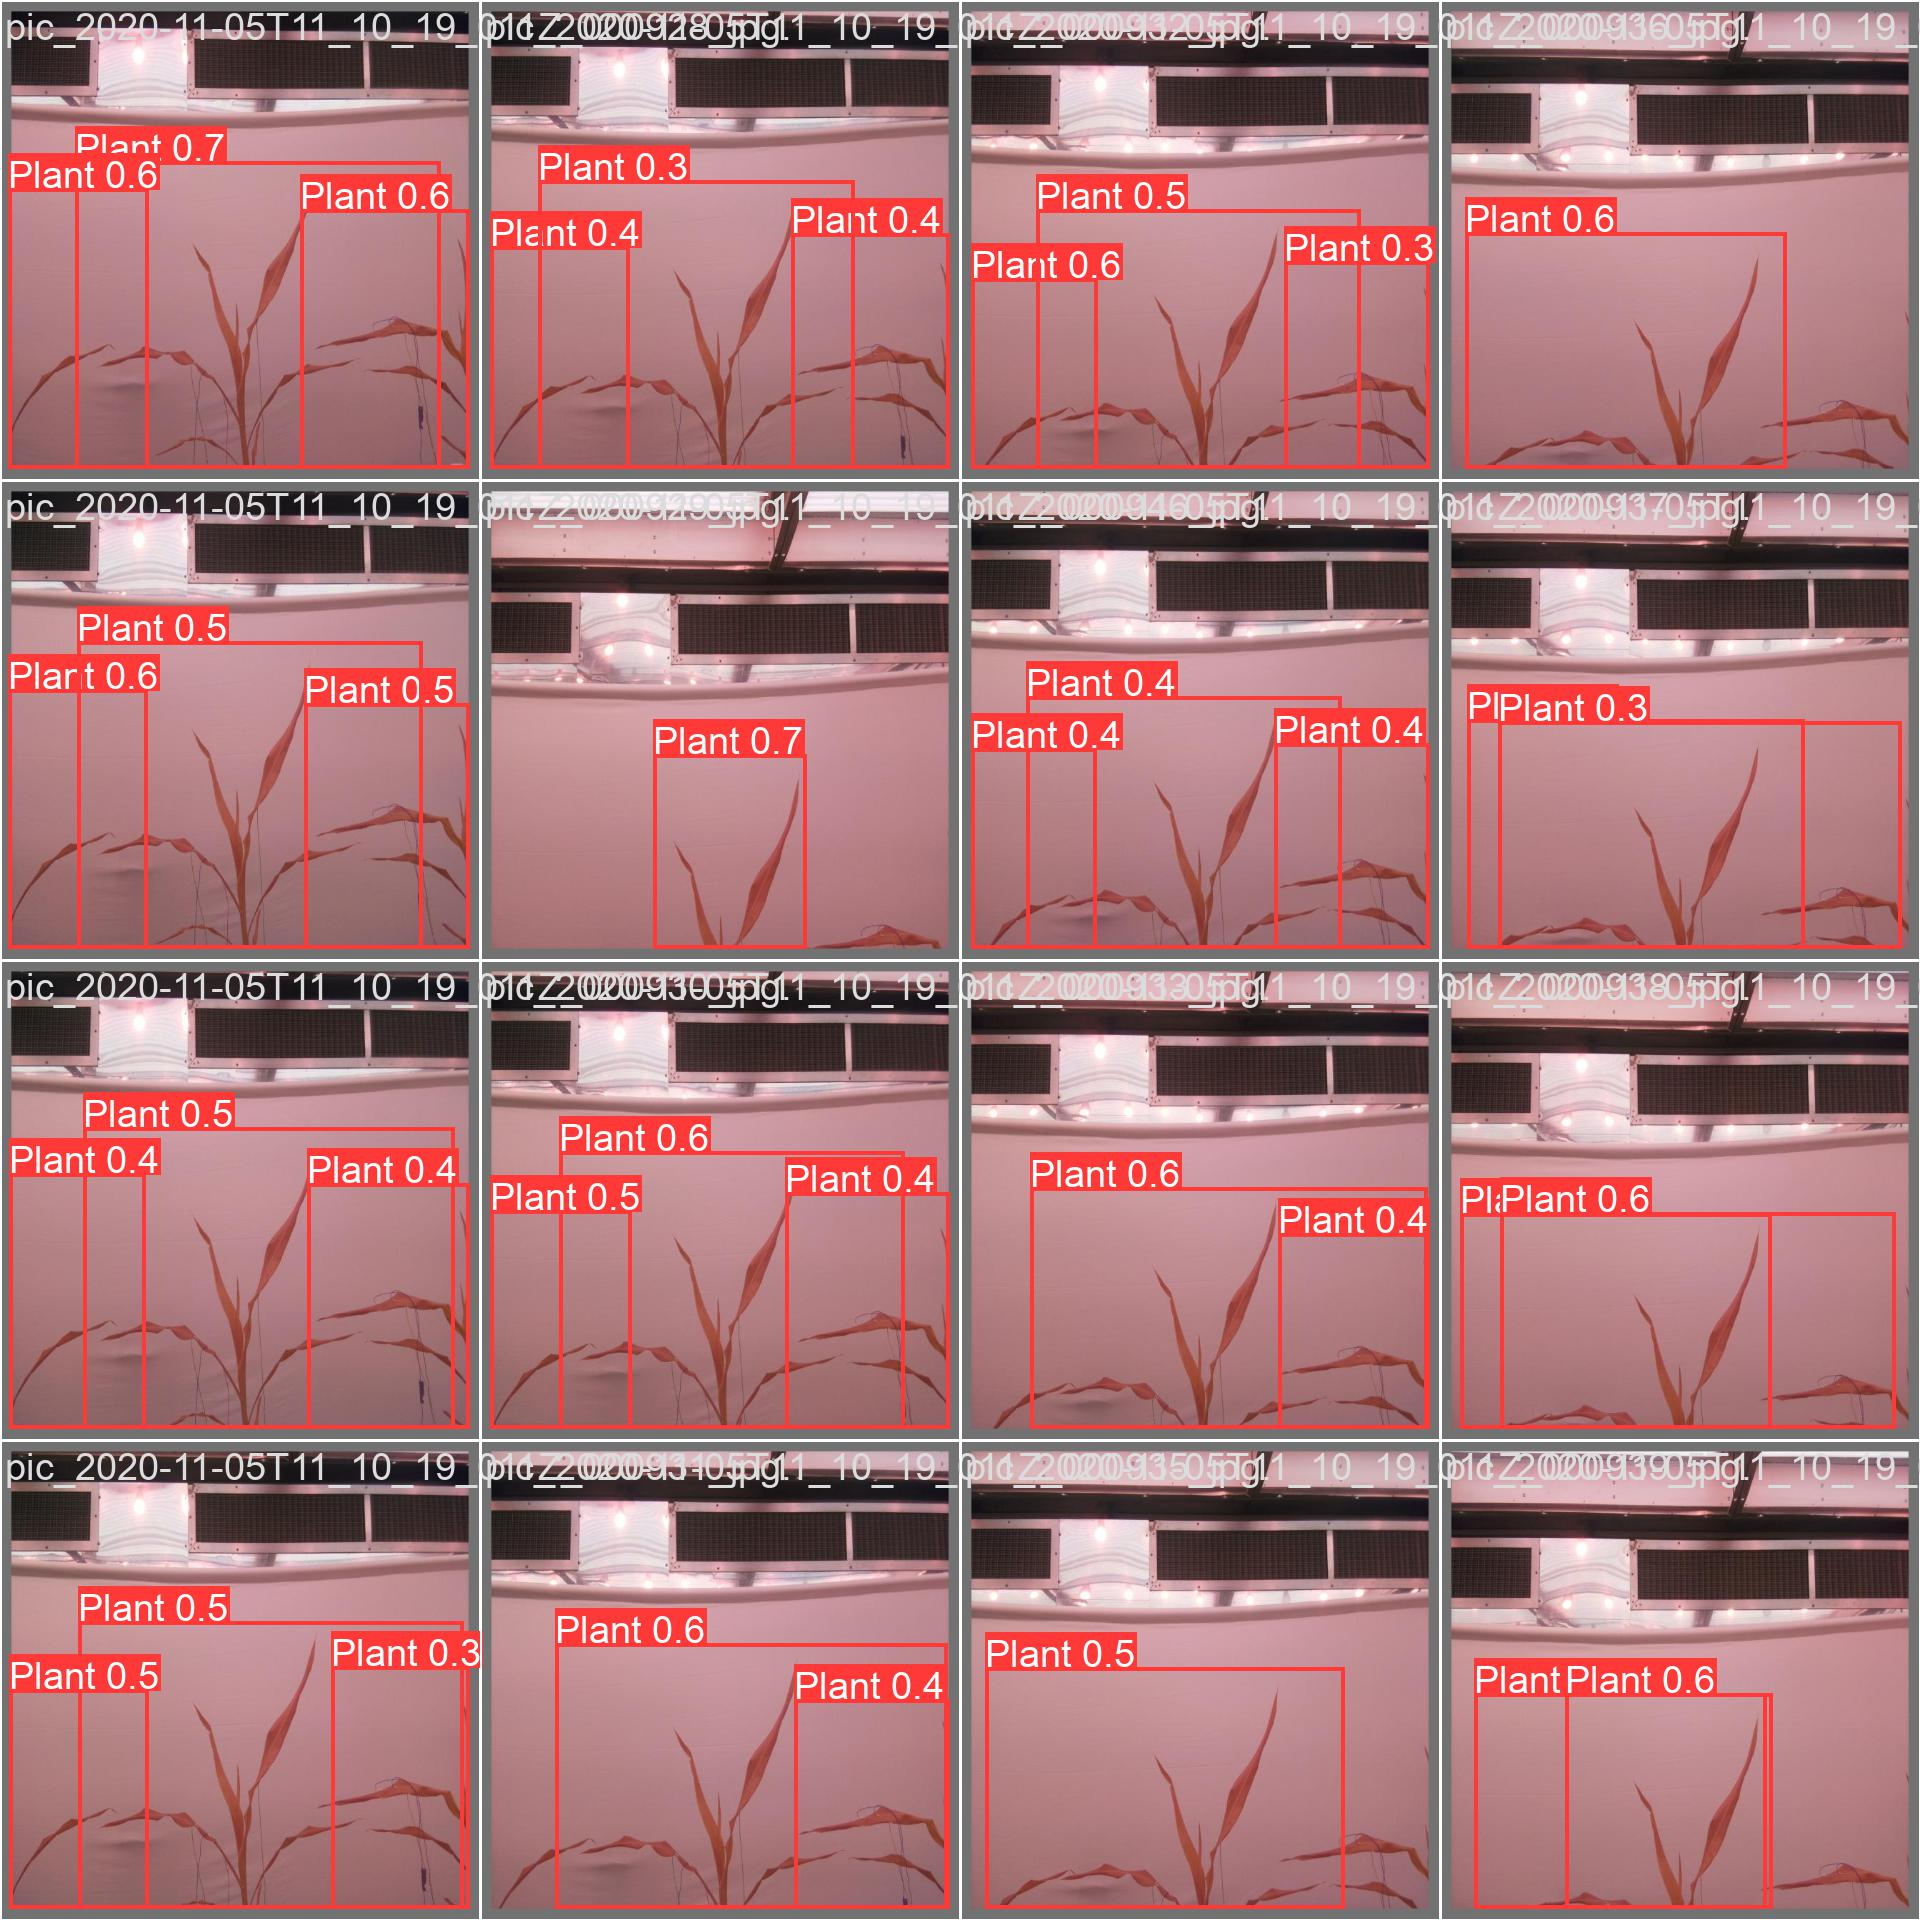

In [28]:
Image(filename='/content/runs/detect/val2/val_batch2_pred.jpg',width=600)

In [37]:
import zipfile
from google.colab import files
import os 

folder_path = '/content/runs'  # Replace with the path to your folder
zip_path = 'runs.zip'  # Replace with the desired path and name for the zip file

# Create a zip file of the folder
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            zipf.write(os.path.join(root, file))

# Download the zip file to your local machine
files.download(zip_path)

AttributeError: ignored